# Сбор и разметка данных

## Семинар 8. Работа с данными

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.set_loglevel('WARNING')
import seaborn as sns

from scipy import stats
from distfit import distfit

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

### Практическое задание

1. **Скачайте датасет House Prices Kaggle со [страницы конкурса](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.**
2. **Загрузите датасет в pandas DataFrame под названием df.**

In [2]:
df = pd.read_csv('./house/train.csv', index_col='Id')
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

3. **Выполните предварительную обработку данных, выполнив следующие шаги:** \
**a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями).**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [4]:
df_null = pd.DataFrame(df.isnull().sum(), columns=['value'])
df_null['perc'] = (df_null['value'] * 100 / df.shape[0]).round(1)
df_null[df_null['value']>0]

value  perc
LotFrontage     259  17.7
Alley          1369  93.8
MasVnrType      872  59.7
MasVnrArea        8   0.5
BsmtQual         37   2.5
BsmtCond         37   2.5
BsmtExposure     38   2.6
BsmtFinType1     37   2.5
BsmtFinType2     38   2.6
Electrical        1   0.1
FireplaceQu     690  47.3
GarageType       81   5.5
GarageYrBlt      81   5.5
GarageFinish     81   5.5
GarageQual       81   5.5
GarageCond       81   5.5
PoolQC         1453  99.5
Fence          1179  80.8
MiscFeature    1406  96.3

In [5]:
def num_dist(X, Y, var):
    fig, ax = plt.subplots(1, 3, figsize=(6*3, 4))

    sns.regplot(x=X, y=Y, ax=ax[0])
    ax[0].set_title(f"{var} Scatter Diagram")

    sns.histplot(X, kde=True, ax=ax[1])
    ax[1].set_title(f"{var} Distribution Histogram")

    stats.probplot(X, dist="norm", plot=plt)
    ax[2].set_title(f"{var} QQ-plot")

    plt.show()

In [6]:
def num_dist_corr(df, var, target, corr=None):
    fig, ax = plt.subplots(1, 2, figsize=(6*2, 4))

    sns.histplot(df[var], kde=True, ax=ax[0])
    ax[0].set_title(f"{var} Distribution Histogram")

    sns.regplot(x=df[var], y=df[target], ax=ax[1])
    if corr:
        ax[1].set_title(f"corr = {corr}")

    plt.show()

In [7]:
def cat_dist(X, Y, var, corr=None):
    fig, ax = plt.subplots(1, 3, figsize=(6*3, 4))

    X.value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05 for _ in X.dropna().unique()], ax=ax[0])
    ax[0].set_ylabel('')
    ax[0].set_title(f"{var} Pie Chart")

    sns.countplot(x=X, ax=ax[1])
    ax[1].set_title(f"{var} Bar Chart")

    sns.violinplot(x=X, y=Y, ax=ax[2])
    if corr:
        ax[2].set_title(f"corr = {corr:.2f}")

    plt.show()

In [8]:
def category_dist(df, var, target, corr_enable=False):
    fig, ax = plt.subplots(1, 3, figsize=(6*3, 4))

    df.groupby(var).size().plot(kind='pie', autopct='%1.1f%%', ax=ax[0])
    ax[0].set_ylabel('')
    ax[0].set_title(f"{var} Pie Chart")

    sns.countplot(data=df, x=var, ax=ax[1])
    ax[1].set_title(f"{var} Bar Chart")

    sns.violinplot(data=df, x=var, y=target, ax=ax[2])
    if corr_enable:
        corr = stats.spearmanr(df[var], df[target])[0]
        ax[2].set_title(f"corr = {corr:.2f}")

    plt.show()

In [9]:
# целевое кодирование
def target_coding(df, var, target):
    df[f"{var}Encoded"] = df.groupby(var)[target].transform('mean')

In [10]:
def cat_dist_encoded(df, var, target, rotation=90):
    encoded = f"{var}Encoded"
    data = df[[var, encoded, target]].sort_values([encoded])

    fig, ax = plt.subplots(1, 3, figsize=(6*3, 4))

    data[var].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05 for _ in df[var].dropna().unique()], ax=ax[0])
    ax[0].set_ylabel('')
    ax[0].set_title(f"{var} Pie Chart")

    sns.countplot(x=data[var], ax=ax[1])
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=rotation)
    ax[1].set_title(f"{var} Bar Chart")

    sns.violinplot(x=data[var], y=data[target], ax=ax[2])
    ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=rotation)

    plt.show()

**LotFrontage** (float64) - длина улицы в линейных футах, соединенной с объектом недвижимости

In [11]:
target = 'SalePrice'
var = 'LotFrontage'
df_null.loc[var]

value    259.0
perc      17.7
Name: LotFrontage, dtype: float64

In [12]:
X = df[var][~(df[var].isnull())]
Y = df[target][~(df[var].isnull())]
X.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

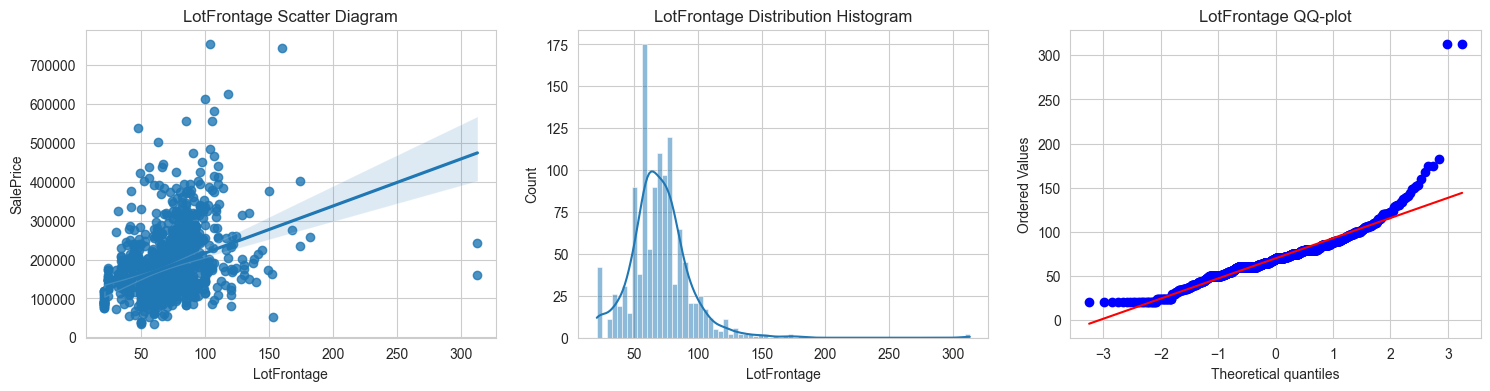

In [13]:
num_dist(X,Y,var)

In [14]:
stats.spearmanr(X,Y)

SignificanceResult(statistic=0.4090755179546496, pvalue=1.1705062786114437e-49)

Процент пропущенных значений 17.7%. \
Распределение ненормальное, внешний вид соответствует, вероятнее всего, логнормальному. \
Слабая линейная зависимость между длиной улицы и ценой. \
Для заполнения пропущенных значений используем моду.

In [15]:
df[var].fillna(df[var].mode()[0], inplace=True)

**Alley** (object) - тип подъездной аллеи к объекту недвижимости

Согласно описанию данных значение `NA` означает отсутствие аллеи.

In [16]:
var = 'Alley'
df_null.loc[var]

value    1369.0
perc       93.8
Name: Alley, dtype: float64

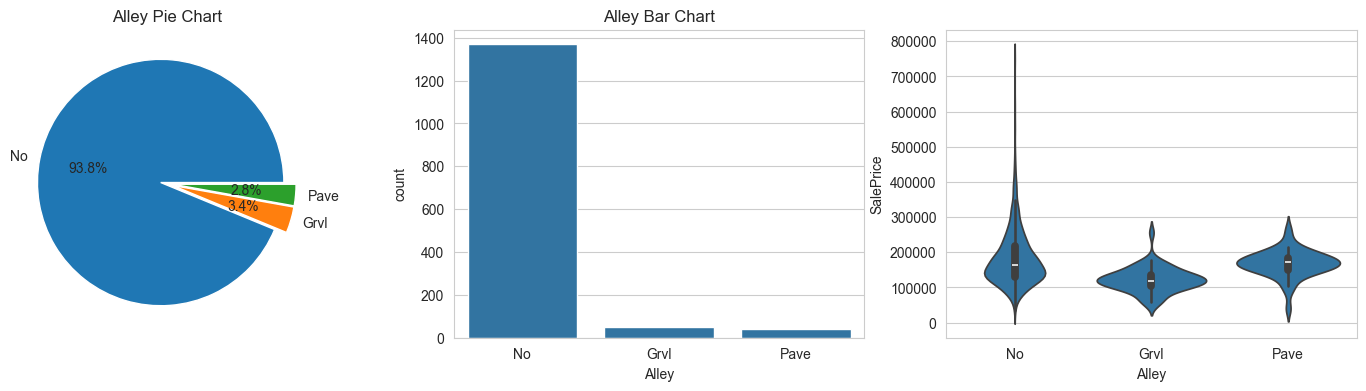

In [17]:
X = df[var].fillna('No')
Y = df[target]
cat_dist(X, Y, var)

Высокий процент пропущенных значений (93.8%). \
Тип подъездной аллеи к объекту недвижимости не влияет на цену. \
Удалим данный столбец.

In [18]:
df.drop(columns=[var], inplace=True)

**MasVnrType** (object) - тип облицовки каменной кладки

Согласно описанию данных значение `NA` означает отсутствие облицовки каменной кладки.

In [19]:
var = 'MasVnrType'
df_null.loc[var]

value    872.0
perc      59.7
Name: MasVnrType, dtype: float64

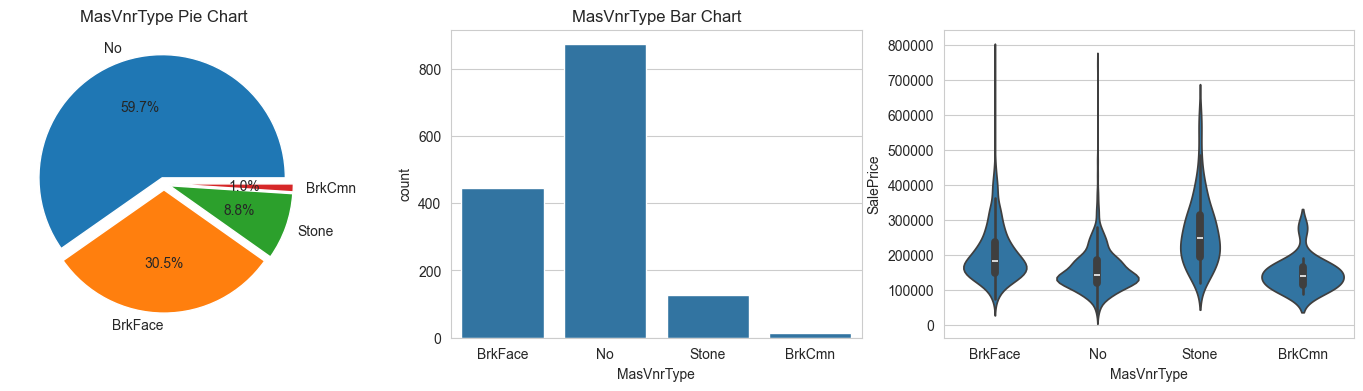

In [20]:
X = df[var].fillna('No')
Y = df[target]
cat_dist(X, Y, var)

Пропущенных значений больше половины (59.7%). \
Большинство домов не имеют каменной облицовки. Дома с облицовкой натуральным камнем в среднем стоят дороже. \
Заполним пропущенные значения `No`.

In [21]:
df[var].fillna('No', inplace=True)

**MasVnrArea** (float64) - площадь облицовки каменной кладки в квадратных футах.

In [22]:
var = 'MasVnrArea'
df_null.loc[var]

value    8.0
perc     0.5
Name: MasVnrArea, dtype: float64

In [23]:
X = df[var][~(df[var].isnull())]
Y = df[target][~(df[var].isnull())]
X.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

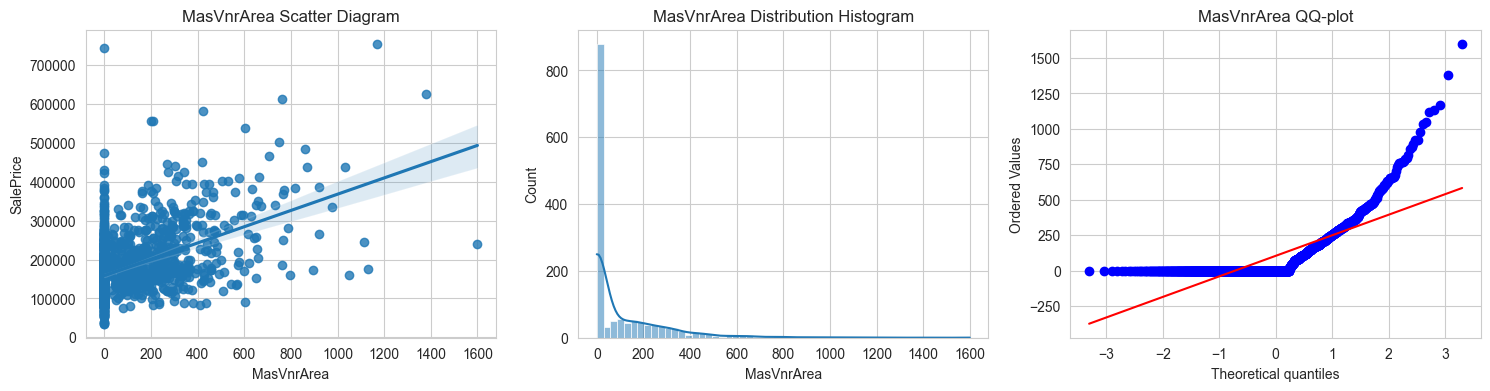

In [24]:
num_dist(X, Y, var)

In [25]:
stats.spearmanr(X,Y)

SignificanceResult(statistic=0.42130949932884704, pvalue=1.4726128013810823e-63)

Очень низкий процент пропущенных значений (0.5%). \
Распределение ненормальное. \
Слабая линейная зависимость между площадью облицовки каменной кладки и ценой. \
Заполним недостающие значения 0.

In [26]:
df[var].fillna(0, inplace=True)

**BsmtQual** (object) - высота подвала \
**BsmtCond** (object) - общее состояние подвала \
**BsmtExposure** (object) - стены подвала на уровне сада или выходного этажа \
**BsmtFinType1** (object) - качество готовой площади подвала \
**BsmtFinType2** (object) - качество второй готовой площади (если имеется)

Согласно описанию данных значение `NA` означает отсутствие подвала. Проверим, согласуются ли данные между собой.

In [27]:
cat_var = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
df_null.loc[cat_var]

value  perc
BsmtQual         37   2.5
BsmtCond         37   2.5
BsmtExposure     38   2.6
BsmtFinType1     37   2.5
BsmtFinType2     38   2.6

In [28]:
data = df[cat_var]
mask_na = data.isna()
mask_nna = data.notna()
data.loc[(mask_na.any(axis=1)) & (mask_nna.any(axis=1))]

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2
Id                                                          
333       Gd       TA           No          GLQ          NaN
949       Gd       TA          NaN          Unf          Unf

Две записи имеют пропуски в данных о подвале при наличии подвала. \
В одном случае пропущена информация о качестве второго подвала, что может указывать на его отсутствие - заполним `No`. \
Во втором случае нет информации об уровне стен подвала - заполним модой.

У всех показателей низкий процент пропущенных значений (2.5% - 2.6%). \
В поле **BsmtExposure** уже есть `No` (No Exposure), поэтому пустые значения заменим `NoB` (No Basement). \
Все остальные пропущенные значения заполним `No`.

In [29]:
df.loc[949, 'BsmtExposure'] = df['BsmtExposure'].mode()[0]

In [30]:
for var in cat_var:
    rep = 'NoB' if var == 'BsmtExposure' else 'No'
    df[var].fillna(rep, inplace=True)

**Electrical** (object) - электрическая система.

In [31]:
var = 'Electrical'
df_null.loc[var]

value    1.0
perc     0.1
Name: Electrical, dtype: float64

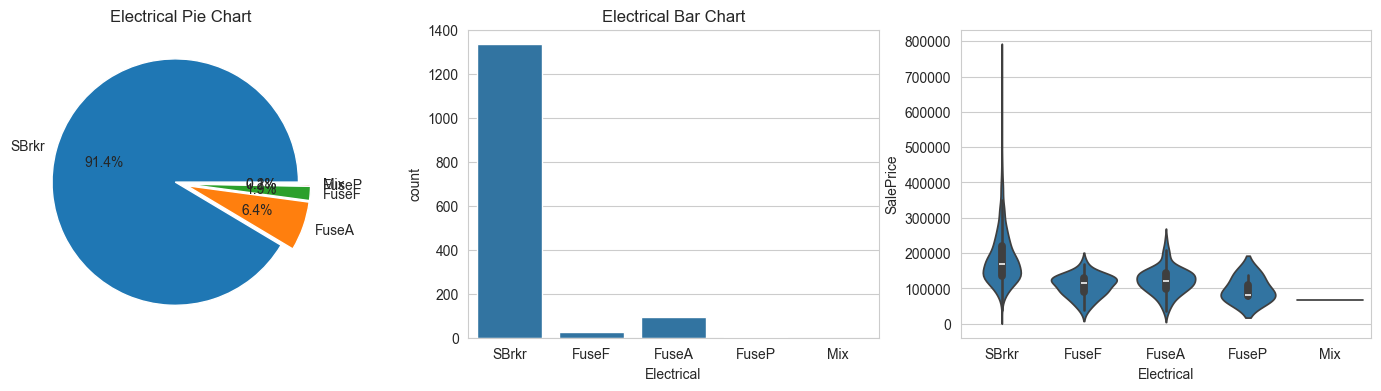

In [32]:
cat_dist(df[var], df[target], var)

Пропущено 1 значение. \
В большинстве домов установлены стандартные автоматические выключатели. \
Заполним пропущенные данные модой.

In [33]:
df[var].fillna(df[var].mode()[0], inplace=True)

**FireplaceQu** (object) - качество камина.

Согласно описанию данных значение `NA` означает отсутствие камина. Проверим по полю `Fireplaces`.

In [34]:
cat_var = ['Fireplaces', 'FireplaceQu']
var = 'FireplaceQu'
df_null.loc[var]

value    690.0
perc      47.3
Name: FireplaceQu, dtype: float64

In [35]:
df[cat_var][(df['Fireplaces']>0) & (df[var].isnull())]

Empty DataFrame
Columns: [Fireplaces, FireplaceQu]
Index: []

Пропущено около половины значений (47.3%), что соответсвует данным об отсутствии камина. \
Заполним недостающие данные `No`.

In [36]:
df[var].fillna('No', inplace=True)

**GarageType** (object) - расположение гаража \
**GarageYrBlt** (float64) - год постройки гаража \
**GarageFinish** (object) - внутренняя отделка гаража \
**GarageQual** (object) - качество гаража \
**GarageCond** (object) - состояние гаража

Согласно описанию данных значение `NA` означает отсутствие гаража. Проверим, согласуются ли данные между собой.

In [37]:
cat_var = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
num_var = ['GarageYrBlt']
df_null.loc[cat_var + num_var]

value  perc
GarageType       81   5.5
GarageFinish     81   5.5
GarageQual       81   5.5
GarageCond       81   5.5
GarageYrBlt      81   5.5

In [38]:
data = df[cat_var][(df['GarageCars']>0) | (df['GarageArea']>0)]
mask_na = data.isna()
mask_nna = data.notna()
data.loc[(mask_na.any(axis=1)) & (mask_nna.any(axis=1))]

Empty DataFrame
Columns: [GarageType, GarageFinish, GarageQual, GarageCond]
Index: []

In [39]:
var = 'GarageYrBlt'
df[var].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [40]:
df[var].value_counts()

GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 97, dtype: int64

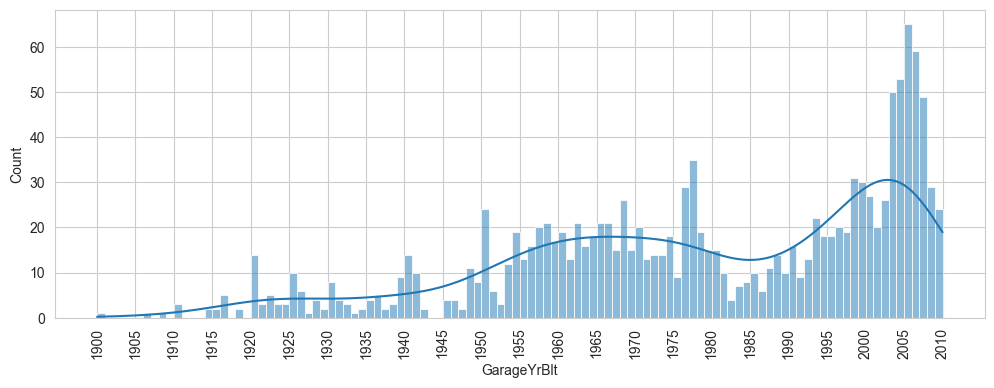

In [41]:
X = df[var][~(df[var].isnull())]
Y = df[target][~(df[var].isnull())]

plt.figure(figsize=(12, 4))
sns.histplot(x=X, binwidth=1, kde=True)
ticks = np.arange(X.min(), X.max()+1, 5)
plt.xticks(ticks=ticks, rotation = 90);

Самый старый гараж 1900 года постройки, а самый новый 2010 года. \
Чаще продаются дома с гаражами 2003-2007 года посторойки.

Низкий процент пропущенных значений, которые соответствуют отсутсвию гаража. \
Заполним пустые данные значением `No`, для года постройки - 0.

In [42]:
for var in cat_var:
    df[var].fillna('No', inplace=True)

df['GarageYrBlt'].fillna(0, inplace=True)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

**PoolQC** (object) - качество бассейна

Согласно описанию данных значение `NA` означает отсутствие бассейна. Проверим по полю **PoolArea**.

In [43]:
var = 'PoolQC'
df[['PoolArea','PoolQC',target]][(df['PoolArea']>0)].sort_values(target)

PoolArea PoolQC  SalePrice
Id                              
1299       480     Gd     160000
1171       576     Gd     171000
811        648     Fa     181000
198        512     Ex     235000
1387       519     Fa     250000
1424       738     Gd     274970
1183       555     Ex     745000

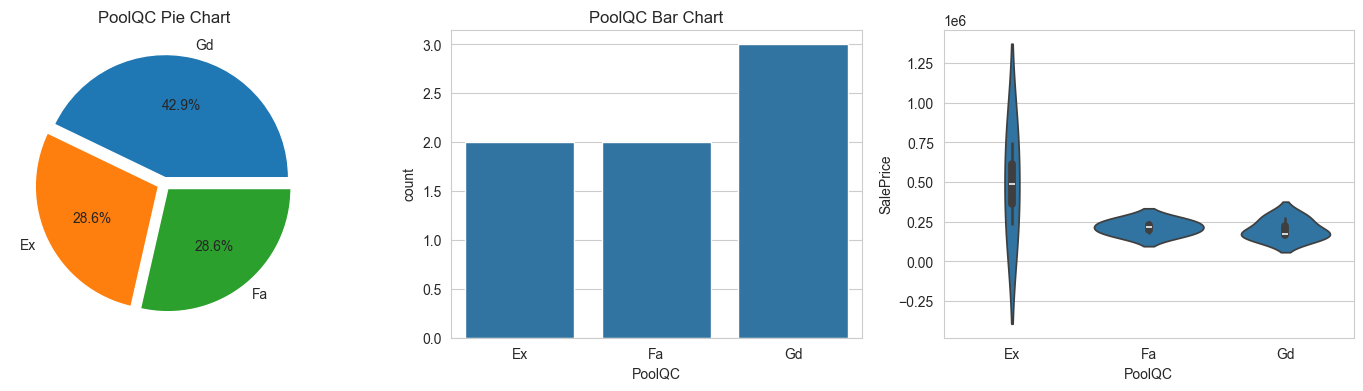

In [44]:
X = df[var][~(df[var].isnull())]
Y = df[target][~(df[var].isnull())]
cat_dist(X, Y, var)

Высокий процент пропущенных значений (99.5%). \
Слишком мало данных, чтобы оченить влияние качества бассейна на цену. \
Удалим данный столбец.

In [45]:
df.drop(columns=[var], inplace=True)

**Fence** (object) - качество ограждения

Согласно описанию данных значение `NA` означает отсутствие ограждения.

In [46]:
var = 'Fence'
df_null.loc[var]

value    1179.0
perc       80.8
Name: Fence, dtype: float64

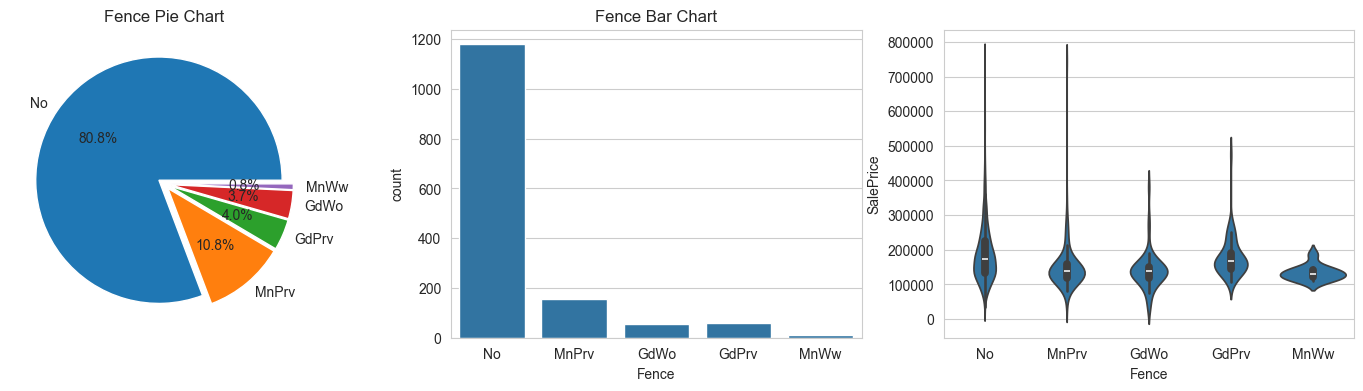

In [47]:
X = df[var].fillna('No')
Y = df[target]
cat_dist(X, Y, var)

Высокий процент пропущенных значений (80.8%). \
Ни наличие, ни качество ограждения не влияют на цену дома. \
Удалим данный столбец.

In [48]:
df.drop(columns=[var], inplace=True)

**MiscFeature** (object) - прочие функции, не включенные в другие категории

Согласно описанию данных значение `NA` означает отсутствие прочих функций.

In [49]:
var = 'MiscFeature'
df_null.loc[var]

value    1406.0
perc       96.3
Name: MiscFeature, dtype: float64

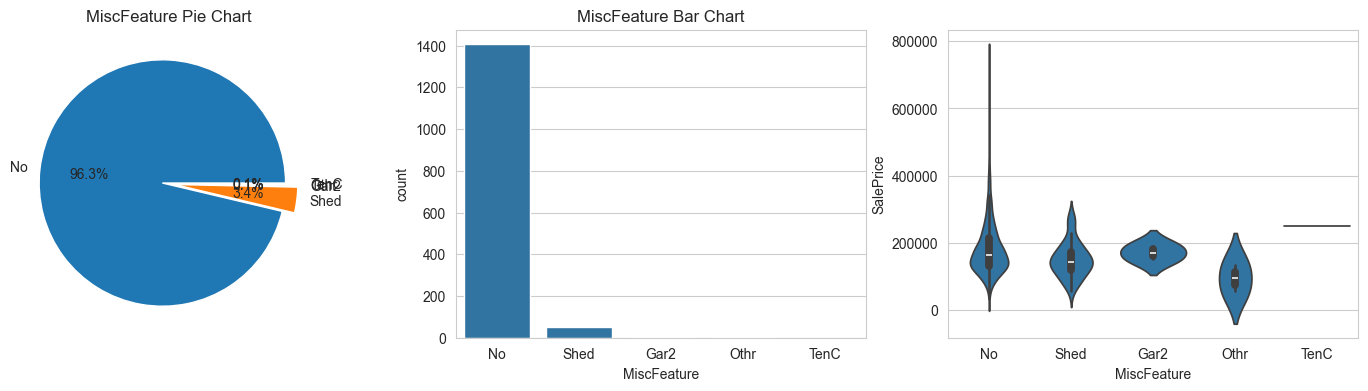

In [50]:
X = df[var].fillna('No')
Y = df[target]
cat_dist(X, Y, var)

In [51]:
X.value_counts()

MiscFeature
No      1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64

Высокий процент пропущенных значений (96.3%). \
Наличие второго гаража или теннисного корта должно влиять на цену дома, но таких значений слишком мало, чтобы выявить взаимосвязь. \
Удалим данный столбец.

In [52]:
df.drop(columns=['MiscFeature'], inplace=True)

**b. Проверьте и обработайте любые дублирующиеся строки в датасете.**

In [53]:
df.duplicated().sum()

0

In [54]:
df[df.duplicated()]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 76 columns]

Повторяющихся строк в датафрейме нет.

**c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).**

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemodAdd 

In [56]:
df.describe().round(1)

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
count      1460.0       1460.0    1460.0       1460.0       1460.0     1460.0   
mean         56.9         68.3   10516.8          6.1          5.6     1971.3   
std          42.3         22.4    9981.3          1.4          1.1       30.2   
min          20.0         21.0    1300.0          1.0          1.0     1872.0   
25%          20.0         60.0    7553.5          5.0          5.0     1954.0   
50%          50.0         63.0    9478.5          6.0          5.0     1973.0   
75%          70.0         79.0   11601.5          7.0          6.0     2000.0   
max         190.0        313.0  215245.0         10.0          9.0     2010.0   

       YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
count        1460.0      1460.0      1460.0      1460.0  ...      1460.0   
mean         1984.9       103.1       443.6        46.5  ...        94.2   
std            20.6       180.7       456.1       161.3  ...       125.3   
min          1950.0         0.0         0.0         0.0  ...         0.0   
25%          1967.0         0.0         0.0         0.0  ...         0.0   
50%          1994.0         0.0       383.5         0.0  ...         0.0   
75%          2004.0       164.2       712.2         0.0  ...       168.0   
max          2010.0      1600.0      5644.0      1474.0  ...       857.0   

       OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
count       1460.0         1460.0     1460.0       1460.0    1460.0   1460.0   
mean          46.7           22.0        3.4         15.1       2.8     43.5   
std           66.3           61.1       29.3         55.8      40.2    496.1   
min            0.0            0.0        0.0          0.0       0.0      0.0   
25%            0.0            0.0        0.0          0.0       0.0      0.0   
50%           25.0            0.0        0.0          0.0       0.0      0.0   
75%           68.0            0.0        0.0          0.0       0.0      0.0   
max          547.0          552.0      508.0        480.0     738.0  15500.0   

       MoSold  YrSold  SalePrice  
count  1460.0  1460.0     1460.0  
mean      6.3  2007.8   180921.2  
std       2.7     1.3    79442.5  
min       1.0  2006.0    34900.0  
25%       5.0  2007.0   129975.0  
50%       6.0  2008.0   163000.0  
75%       8.0  2009.0   214000.0  
max      12.0  2010.0   755000.0  

[8 rows x 37 columns]

In [57]:
df.describe(include=['object'])

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1460   1460     1460        1460      1460      1460      1460   
unique        5      2        4           4         2         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq       1151   1454      925        1311      1459      1052      1382   

       Neighborhood Condition1 Condition2  ... KitchenQual Functional  \
count          1460       1460       1460  ...        1460       1460   
unique           25          9          8  ...           4          7   
top           NAmes       Norm       Norm  ...          TA        Typ   
freq            225       1260       1445  ...         735       1360   

       FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
count         1460       1460         1460       1460       1460       1460   
unique           6          7            4          6          6          3   
top             No     Attchd          Unf         TA         TA          Y   
freq           690        870          605       1311       1326       1340   

       SaleType SaleCondition  
count      1460          1460  
unique        9             6  
top          WD        Normal  
freq       1267          1198  

[4 rows x 39 columns]

Согласно описанию данных в датасете несколько ранговых переменных представлены в виде строк. \
Введем цифровую шкалу и заменим значения на числовые.

**ExterQual** - качество материала на внешней стороне \
**ExterCond** - текущее состояние материала на внешней поверхности \
**BsmtQual** - высота подвала \
**BsmtCond** - общее состояние подвала \
**HeatingQC** - качество и состояние отопления \
**KitchenQual** - качество кухни \
**FireplaceQu** - качество камина \
**GarageQual** - качество гаража \
**GarageCond** - состояние гаража


In [58]:
cat_var = ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtCond', 'BsmtQual']
rep = {'No': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
for var in cat_var:
    df[var].replace(rep, inplace=True)

**BsmtExposure** - стены подвала на уровне сада или выходного этажа \
**BsmtFinType1** - качество готовой площади подвала \
**BsmtFinType2** - качество второй готовой площади (если имеется) \
**GarageFinish** - внутренняя отделка гаража

Переведем категориальные переменные в тип данных category с указанием порядка.

In [59]:
categories = ['NoB','No','Mn','Av','Gd']
df['BsmtExposure'] = pd.Categorical(df['BsmtExposure'], categories=categories, ordered=True)

categories = ['No','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
for var in ['BsmtFinType1','BsmtFinType2']:
    df[var] = pd.Categorical(df[var], categories=categories, ordered=True)

categories = ['No','Unf','RFn','Fin']
df['GarageFinish'] = pd.Categorical(df['GarageFinish'], categories=categories, ordered=True)

**CentralAir** (центральное кондиционирование воздуха) имеет два значения `No` и `Yes`. Закодируем их 0 и 1 соответсвенно.

In [60]:
var = 'CentralAir'
rep = {'N': 0, 'Y': 1}
df[var].replace(rep, inplace=True)

**YearRemodAdd** - дата реконструкции (совпадает с датой строительства, если перепланировка или пристройки не проводились)

Добавим показатель **RemodAdd** со значениями: 1 - была реконструкция, 0 - перепланировка или пристройки не проводились.

In [61]:
df['RemodAdd'] = df.apply(lambda df: 0 if df['YearBuilt'] == df['YearRemodAdd'] else 1, axis=1)
df['RemodAdd'].value_counts()

RemodAdd
0    764
1    696
Name: count, dtype: int64

4. **Проведите разведочный анализ данных (EDA), ответив на следующие вопросы:** \
   **a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы?**

In [62]:
df[target].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

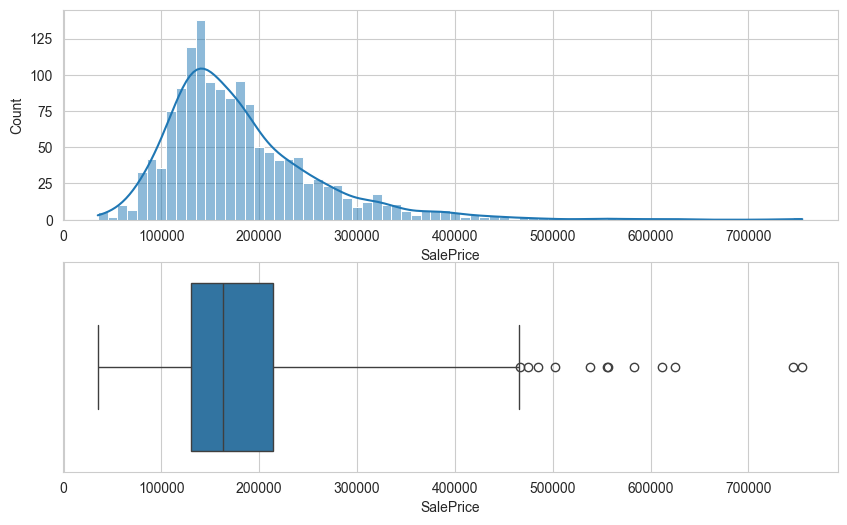

In [63]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
sns.histplot(df[target], binwidth=10000, kde=True, ax=ax[0])
sns.boxplot(x=df[target], whis=3, ax=ax[1]);

In [64]:
Y = df[target]
dfit = distfit()
result = dfit.fit_transform(Y)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 5.45105e-11] [loc=180921.196 scale=79415.292]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 1.81978e-10] [loc=34900.000 scale=146021.196]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 3.23125e-10] [loc=34900.000 scale=0.000]
[distfit] >INFO> [dweibull  ] [0.03 sec] [RSS: 2.87788e-11] [loc=166383.808 scale=57223.063]
[distfit] >INFO> [t         ] [0.17 sec] [RSS: 5.45096e-11] [loc=180920.540 scale=79415.160]
[distfit] >INFO> [genextreme] [0.12 sec] [RSS: 3.20293e-10] [loc=34900.132 scale=1.305]
[distfit] >INFO> [gamma     ] [0.05 sec] [RSS: 2.82294e-10] [loc=-75061475.684 scale=10993.592]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 1.25554e-11] [loc=-126.417 scale=166853.496]
[distfit] >INFO> [beta      ] [0.07 sec] [RSS: 2.01587e-11] [loc=24176.867 scale=2122600.504]
[distfit] >INFO> [uniform   ] [0.0 sec] [RSS: 2.38664e-10] [loc=34900.000 scale=720100.000]
[distfit] >INFO> [loggamma  ] 

In [65]:
result['model']

{'name': 'lognorm',
 'score': 1.2555425708391397e-11,
 'loc': -126.41694789009435,
 'scale': 166853.49551208408,
 'arg': (0.39898746729025825,),
 'params': (0.39898746729025825, -126.41694789009435, 166853.49551208408),
 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x22a6f8689d0>,
 'bootstrap_score': 0,
 'bootstrap_pass': None,
 'color': '#e41a1c',
 'CII_min_alpha': 86433.78709389127,
 'CII_max_alpha': 321500.47005855746}

In [66]:
Q1 = Y.quantile(.25)
Q3 = Y.quantile(.75)
IQR = Q3 - Q1
out = Y[(Y < (Q1-3*IQR)) | (Y > (Q3+3*IQR))].sort_values()
df.loc[out.index]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                            
1374          20       RL         60.0    11400   Pave      Reg         Lvl   
186           75       RM         90.0    22950   Pave      IR2         Lvl   
799           60       RL        104.0    13518   Pave      Reg         Lvl   
179           20       RL         63.0    17423   Pave      IR1         Lvl   
770           60       RL         47.0    53504   Pave      IR2         HLS   
441           20       RL        105.0    15431   Pave      Reg         Lvl   
1047          60       RL         85.0    16056   Pave      IR1         Lvl   
804           60       RL        107.0    13891   Pave      Reg         Lvl   
899           20       RL        100.0    12919   Pave      IR1         Lvl   
1170          60       RL        118.0    35760   Pave      IR1         Lvl   
1183          60       RL        160.0    15623   Pave      IR1         Lvl   
692           60       RL        104.0    21535   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope  ... 3SsnPorch ScreenPorch PoolArea  \
Id                                  ...                                  
1374    AllPub    Inside       Gtl  ...         0           0        0   
186     AllPub    Inside       Gtl  ...         0         410        0   
799     AllPub    Inside       Gtl  ...         0           0        0   
179     AllPub   CulDSac       Gtl  ...         0           0        0   
770     AllPub   CulDSac       Mod  ...         0         210        0   
441     AllPub    Inside       Gtl  ...         0         170        0   
1047    AllPub    Inside       Gtl  ...         0           0        0   
804     AllPub    Inside       Gtl  ...         0         192        0   
899     AllPub    Inside       Gtl  ...         0           0        0   
1170    AllPub   CulDSac       Gtl  ...         0           0        0   
1183    AllPub    Corner       Gtl  ...         0           0      555   
692     AllPub    Corner       Gtl  ...         0           0        0   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice RemodAdd  
Id                                                                        
1374       0      3    2007        WD         Normal     466500        1  
186        0      6    2006        WD         Normal     475000        1  
799        0      7    2009       New        Partial     485000        1  
179        0      7    2009       New        Partial     501837        1  
770        0      6    2010        WD         Normal     538000        0  
441        0      4    2009        WD         Normal     555000        0  
1047       0      7    2006       New        Partial     556581        1  
804        0      1    2009       New        Partial     582933        1  
899        0      3    2010       New        Partial     611657        1  
1170       0      7    2006        WD         Normal     625000        1  
1183       0      7    2007        WD        Abnorml     745000        0  
692        0      1    2007        WD         Normal     755000        1  

[12 rows x 77 columns]

Распределение цены продажи логнормальное, есть выбросы.

**b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции?** \
**c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д.** \
**d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.**

Кроме цены дома есть еще информация по продажам: месяц продажи (MoSold), год продажи (YrSold), тип продажи (SaleType) и условия продажи (SaleCondition).

In [67]:
data = df[['MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]
data['DaSold'] = data['YrSold'].astype(str) + '-' + data['MoSold'].astype(str).str.zfill(2)
data.sort_values(['DaSold'], inplace=True)

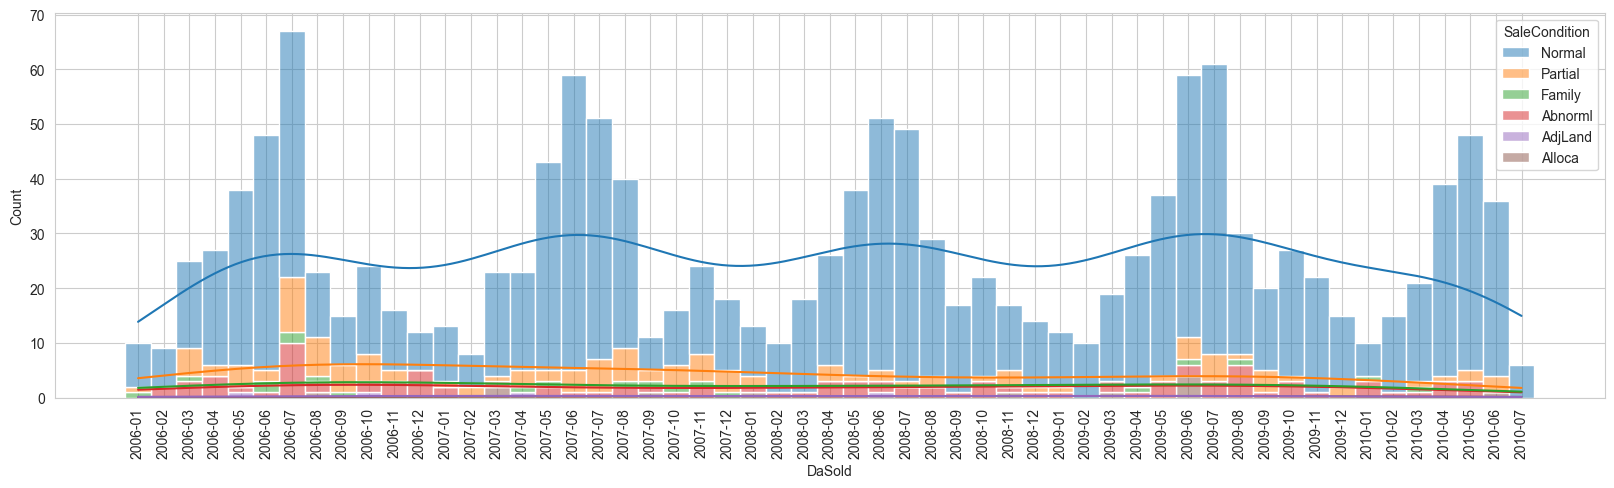

In [68]:
plt.figure(figsize=(20, 5))
sns.histplot(data=data, x='DaSold', binwidth=1, kde=True, hue='SaleCondition', multiple="stack")
plt.xticks(rotation = 90);

Данные о продажах домов с января 2006 по июль 2010 года. В основном это сделки с обычной продажей. Наблюдается выраженная сезонность.

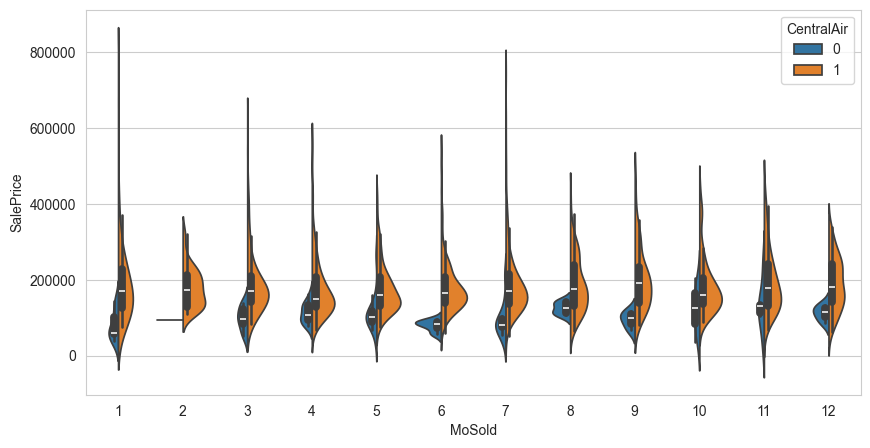

In [69]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='MoSold', y=target, hue='CentralAir', split=True);

Цена продажи дома не зависит от даты продажи, несмотря на высокий спрос в летние месяцы. \
Наличие центральной системы кондиционирования воздуха влияет на цену.

**YearBuilt** - первоначальная дата постройки \
**YearRemodAdd** - дата реконструкции (совпадает с датой строительства, если перепланировка или пристройки не проводились)

In [70]:
df['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [71]:
df['YearBuilt'].value_counts()

YearBuilt
2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: count, Length: 112, dtype: int64

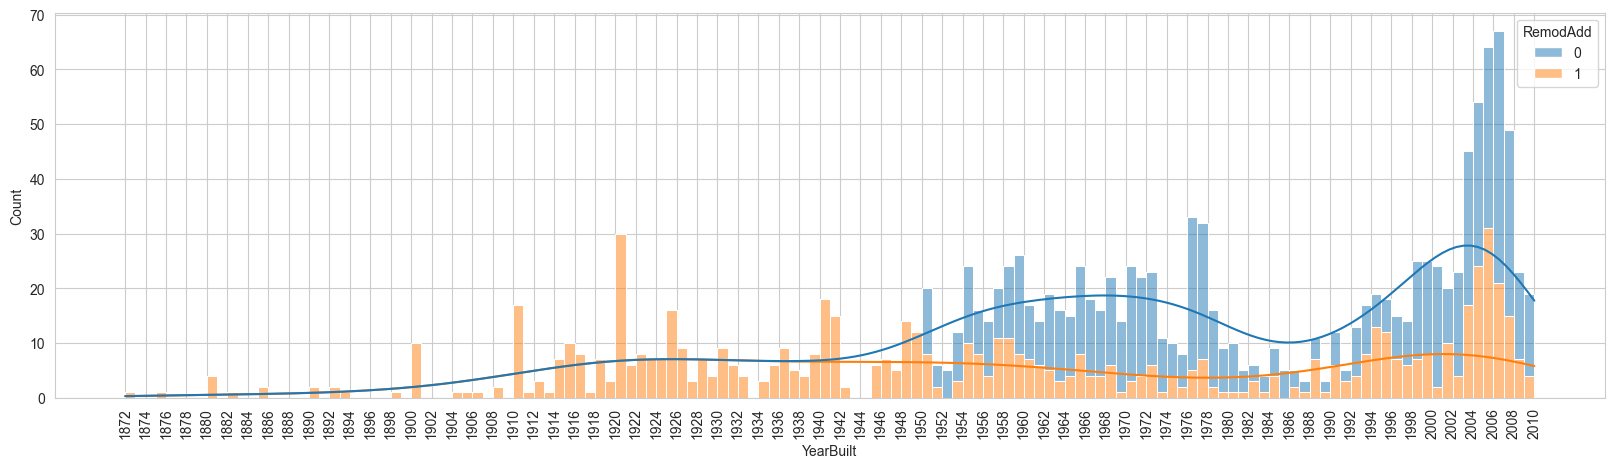

In [72]:
plt.figure(figsize=(20, 5))
sns.histplot(data=df, x='YearBuilt', binwidth=1, kde=True, hue='RemodAdd', multiple="stack")
ticks = np.arange(df['YearBuilt'].min(), df['YearBuilt'].max()+1, 2)
plt.xticks(ticks=ticks, rotation = 90);

В датасете самые старые дома 1872 года посторойки, а самые новые 2010 года. \
Чаще всего покупают дома 2003-2007 года постройки. \
Все дома до 1951 года постройки были реконструированы.

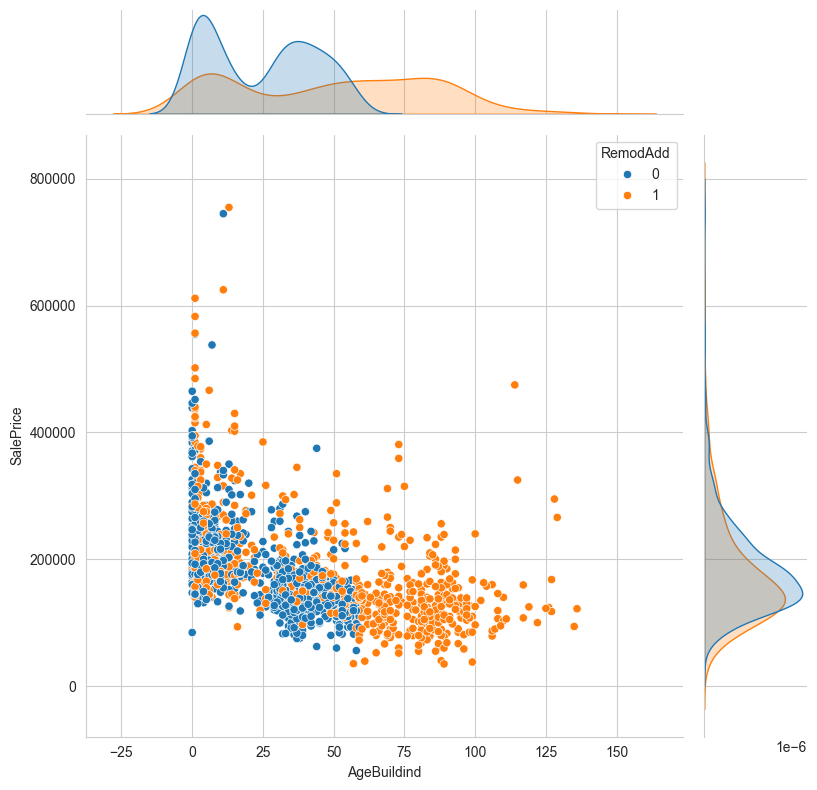

In [73]:
df['AgeBuildind'] = df['YrSold'] - df['YearBuilt']
sns.jointplot(data=df, x='AgeBuildind', y=target, hue='RemodAdd', height=8);

Наблюдается общая тенденция снижения цены с увеличением возраста дома. \
Проведение реконструкции дома в целом не влияет на цену.

**MSZoning** - территориальная классификация

In [74]:
var = 'MSZoning'
df[var].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

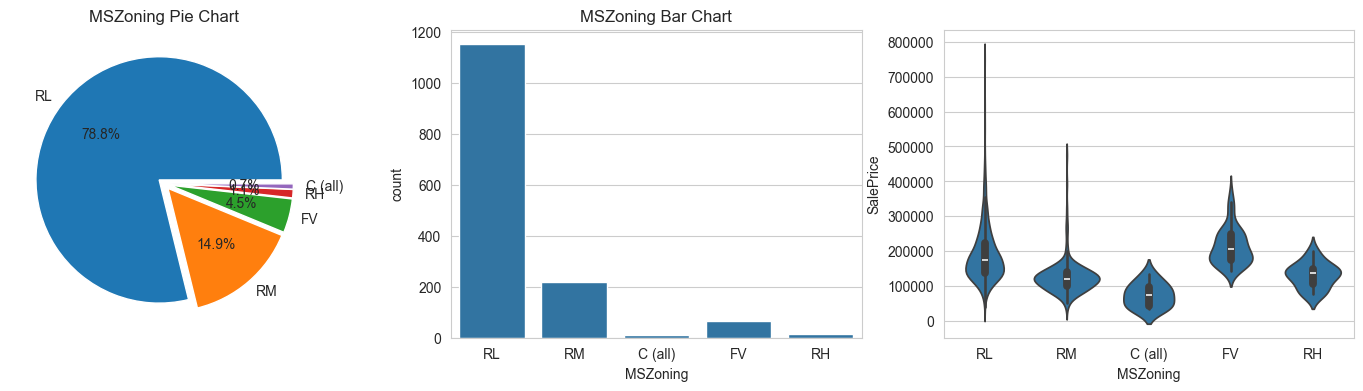

In [75]:
cat_dist(df[var], df[target], var)

Большинство домов из зоны с низкой плотностью застройки. \
Из-за большого дисбаланса в данных сложно оценить влияние территориальной классификации на цену.

Построим корреляционную матрицу для численных факторов.

Добавим поле TotalArea = GrLivArea (жилая площадь надземной части) + TotalBsmtSF (площадь подвала)

In [76]:
df['TotalArea'] = df['GrLivArea'] + df['TotalBsmtSF']
num_var = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
           'MasVnrArea', 'ExterQual', 'ExterCond',
           'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
           'HeatingQC',
           '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
           'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
           'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
           'Fireplaces', 'FireplaceQu',
           'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
           'PoolArea', 'MiscVal', 'TotalArea']
data = df[[target] + num_var]
corr_matrix = data.corr().round(2)

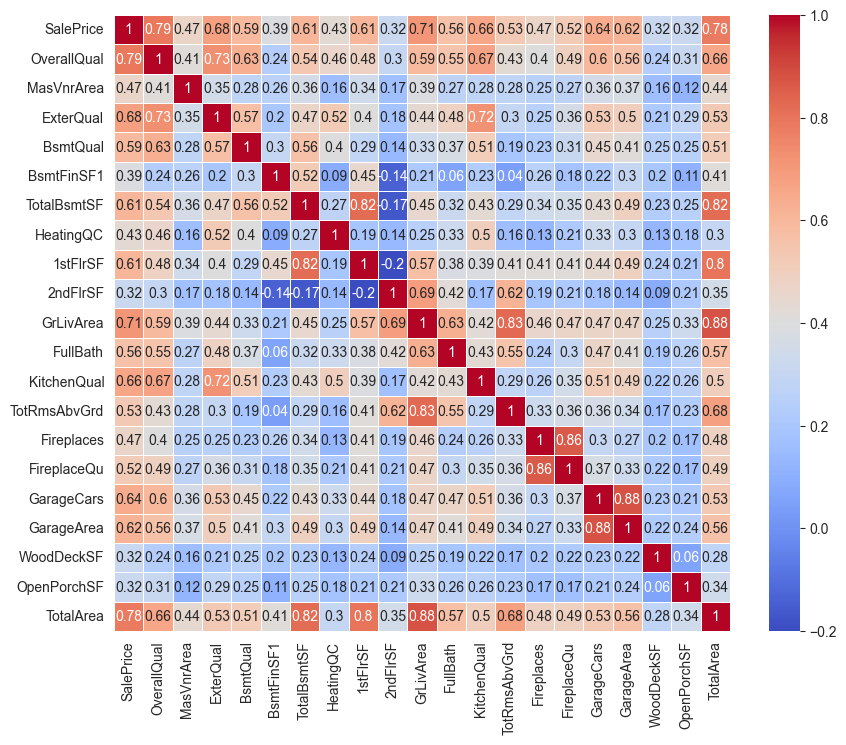

In [77]:
corr_var = corr_matrix[abs(corr_matrix[target])>0.3].index.to_list()
data = df[corr_var]
matrix = data.corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', linewidths= 0.5, square=True)
plt.show()

In [78]:
corr_matrix[target].sort_values(ascending=False)

SalePrice        1.00
OverallQual      0.79
TotalArea        0.78
GrLivArea        0.71
ExterQual        0.68
KitchenQual      0.66
GarageCars       0.64
GarageArea       0.62
TotalBsmtSF      0.61
1stFlrSF         0.61
BsmtQual         0.59
FullBath         0.56
TotRmsAbvGrd     0.53
FireplaceQu      0.52
MasVnrArea       0.47
Fireplaces       0.47
HeatingQC        0.43
BsmtFinSF1       0.39
2ndFlrSF         0.32
WoodDeckSF       0.32
OpenPorchSF      0.32
HalfBath         0.28
GarageQual       0.27
GarageCond       0.26
LotArea          0.26
BsmtFullBath     0.23
BsmtUnfSF        0.21
BsmtCond         0.21
BedroomAbvGr     0.17
ScreenPorch      0.11
PoolArea         0.09
3SsnPorch        0.04
ExterCond        0.02
BsmtFinSF2      -0.01
MiscVal         -0.02
BsmtHalfBath    -0.02
LowQualFinSF    -0.03
OverallCond     -0.08
MSSubClass      -0.08
EnclosedPorch   -0.13
KitchenAbvGr    -0.14
Name: SalePrice, dtype: float64

Сильная линейная зависимость:
 - OverallQual - оценка качества материала и отделки дома
 - TotalArea - общая площадь дома (с подвалом)
 - GrLivArea - жилая площадь надземной части

Средняя линейная зависимость:
 - ExterQual - оценка качества материала на внешней стороне
 - KitchenQual - качество кухни
 - GarageCars - размер гаража в пересчете на вместимость автомобиля
 - GarageArea - площадь гаража в квадратных футах
 - TotalBsmtSF - общая площадь подвала в квадратных футах
 - 1stFlrSF - площадь первого этажа в квадратных футах
 - BsmtQual - высота подвала
 - FullBath - ванные комнаты в жилой зоне
 - TotRmsAbvGrd - общее количество комнат в жилой зоне (без учета ванных комнат)
 - FireplaceQu - качество камина

Слабая линейная зависимость:
 - MasVnrArea - площадь облицовки каменной кладки в квадратных футах
 - Fireplaces - количество каминов
 - HeatingQC - качество и состояние отопления
 - BsmtFinSF1 - тип 1 готовые квадратные футы подвала
 - OpenPorchSF - площадь открытой веранды в квадратных футах
 - 2ndFlrSF - площадь второго этажа в квадратных футах
 - WoodDeckSF - площадь деревянного настила в квадратных футах

Посмотрим распределение численных факторов, связанных с площадью.

**LotArea** - размер участка в квадратных футах \
**TotalBsmtSF** - общая площадь подвала в квадратных футах \
**1stFlrSF** - площадь первого этажа в квадратных футах \
**2ndFlrSF** - площадь второго этажа в квадратных футах \
**GrLivArea** - жилая площадь надземной части в квадратных футах \
**GarageArea** - площадь гаража в квадратных футах \
**WoodDeckSF** - площадь деревянного настила в квадратных футах \
**OpenPorchSF** - площадь открытой веранды в квадратных футах \
**EnclosedPorch** - площадь крытого крыльца в квадратных футах \
**3SsnPorch** - площадь веранды на три сезона в квадратных футах \
**ScreenPorch** - площадь крыльца с сеткой в квадратных футах \
**PoolArea** - площадь бассейна в квадратных футах \
**TotalArea** - общая площадь дома (с подвалом)

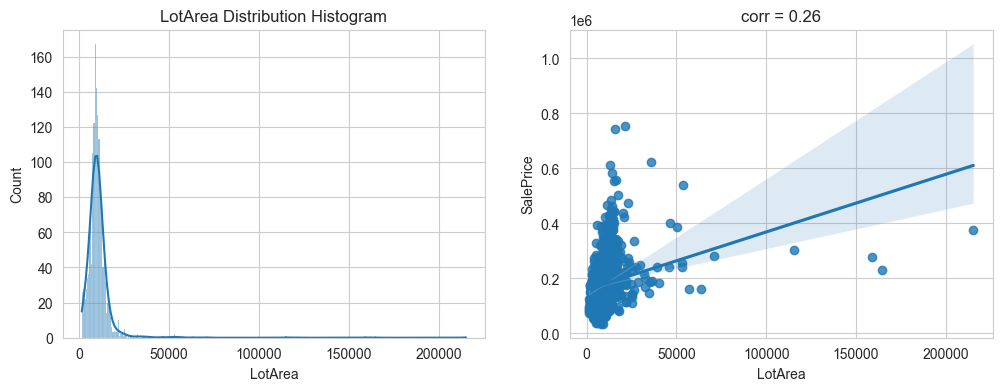

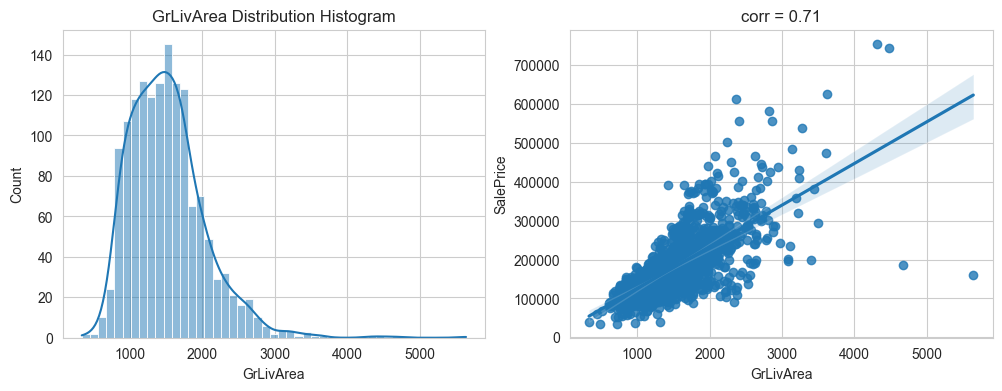

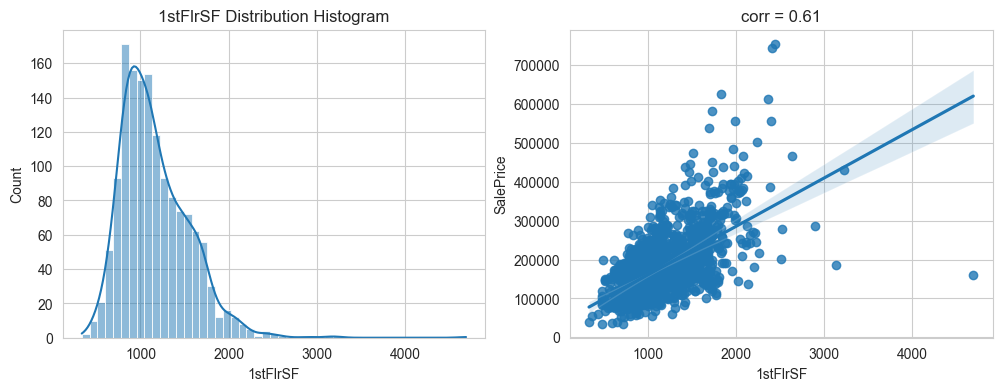

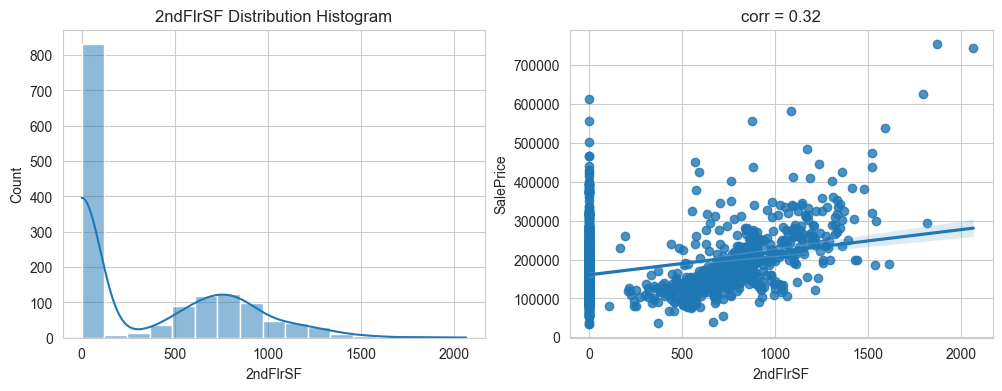

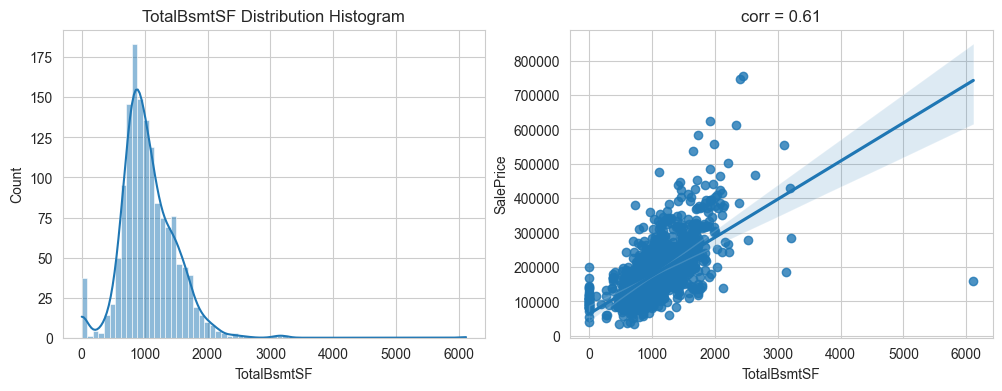

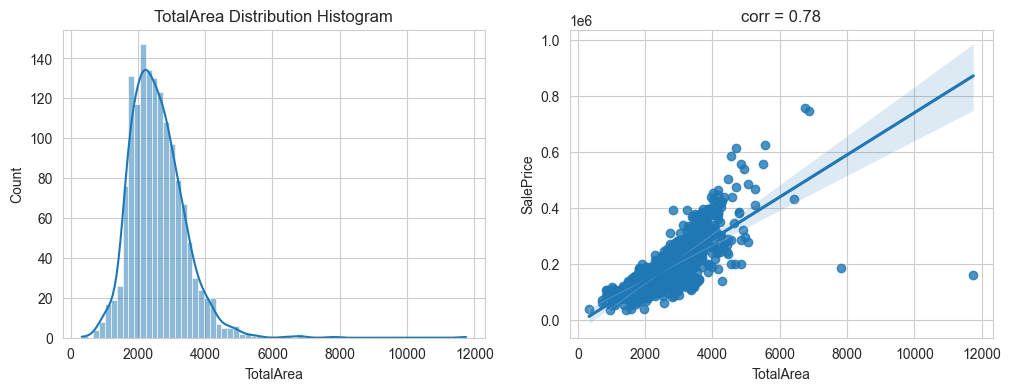

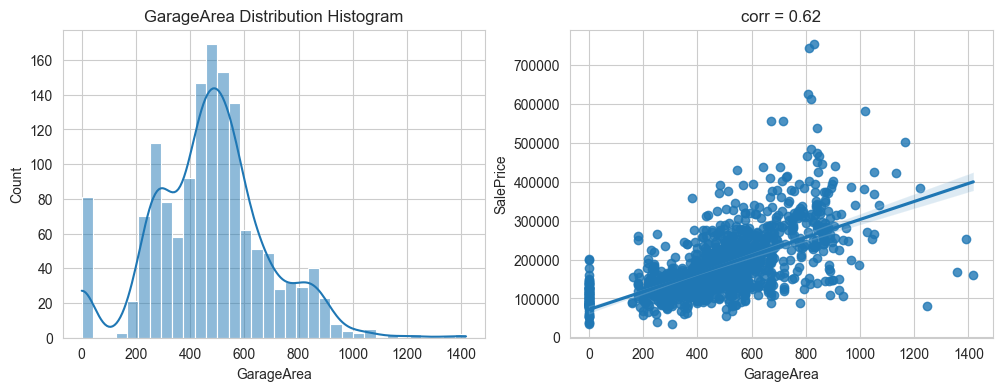

In [79]:
num_var = ['LotArea', 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'TotalArea', 'GarageArea']
for var in num_var:
    num_dist_corr(df, var, target, corr_matrix.loc[var,target])

Сильная линейная зависимость цены с **TotalArea** и **GrLivArea**. Сумма **1stFlrSF** и **2ndFlrSF** составляет **GrLivArea**. \
Средняя линейная зависимость цены с **TotalBsmtSF**. \
Площадь гаража (**GarageArea**) имеет среднюю линейную связь с ценой дома и сильную линейную связь с размером гаража в пересчете на вместимость автомобиля. \
**LotArea** на цену не влияет.

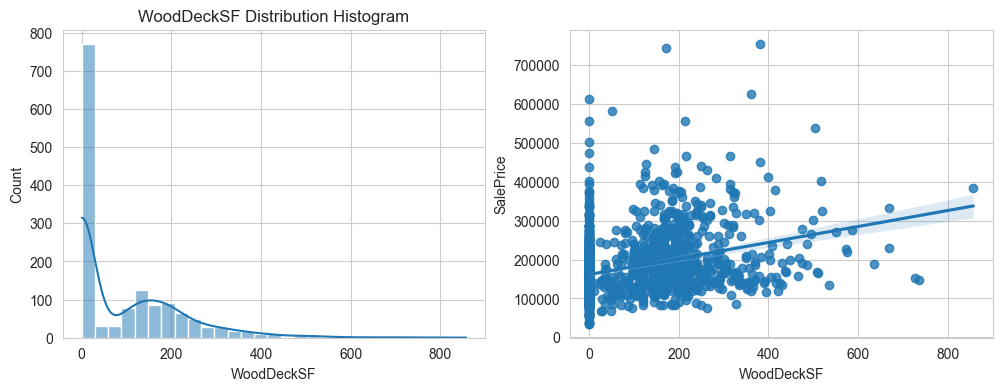

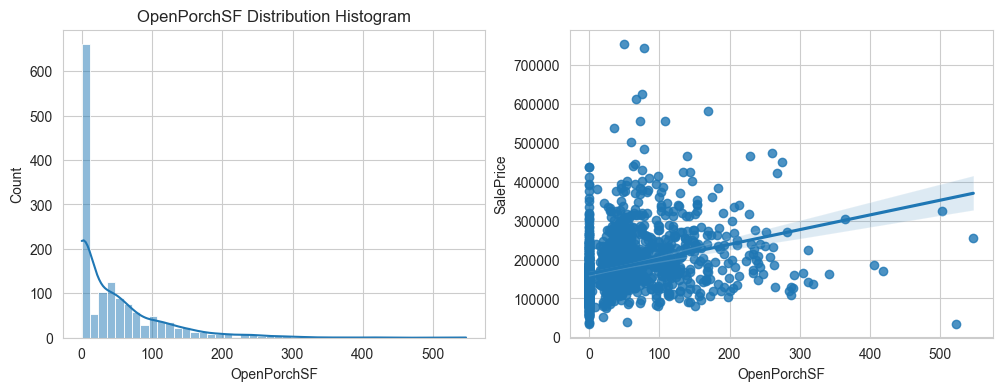

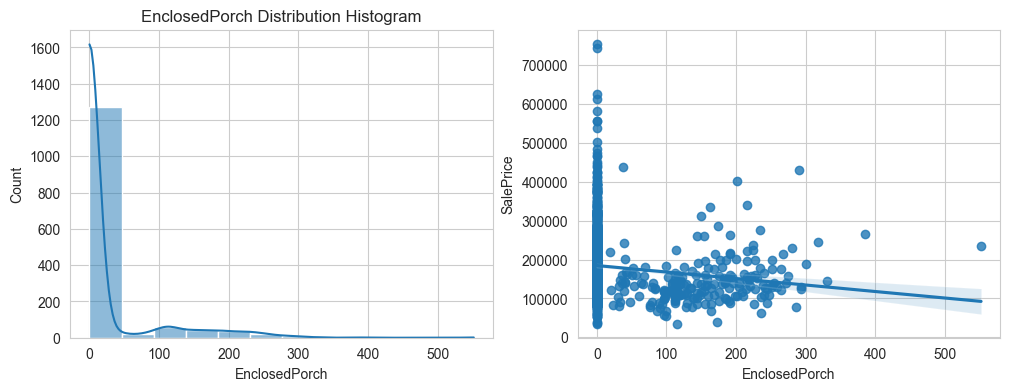

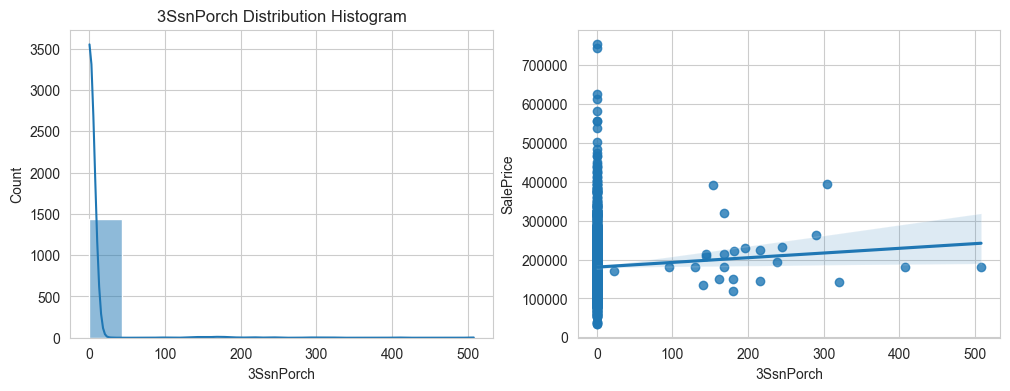

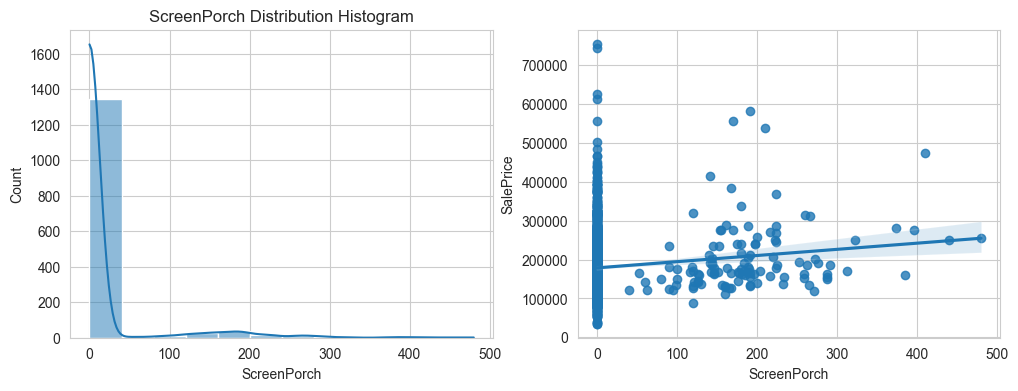

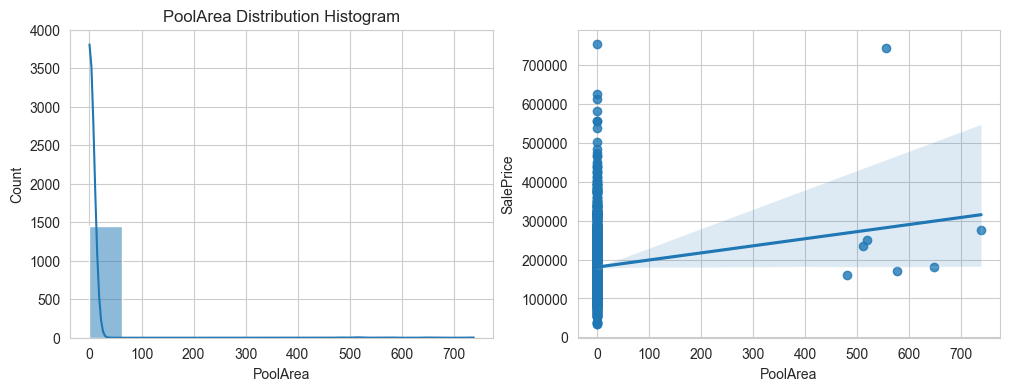

In [80]:
num_var = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
for var in num_var:
    num_dist_corr(df, var, target)

Дополнительные пристройки (настил, крыльцо, веранда) на цену дома не влияют. \
Домов с бассейном слишком мало, чтобы установить зависимость.

**OverallQual** - оценка качества материала и отделки дома \
**OverallCond** - оценка общего состояния дома

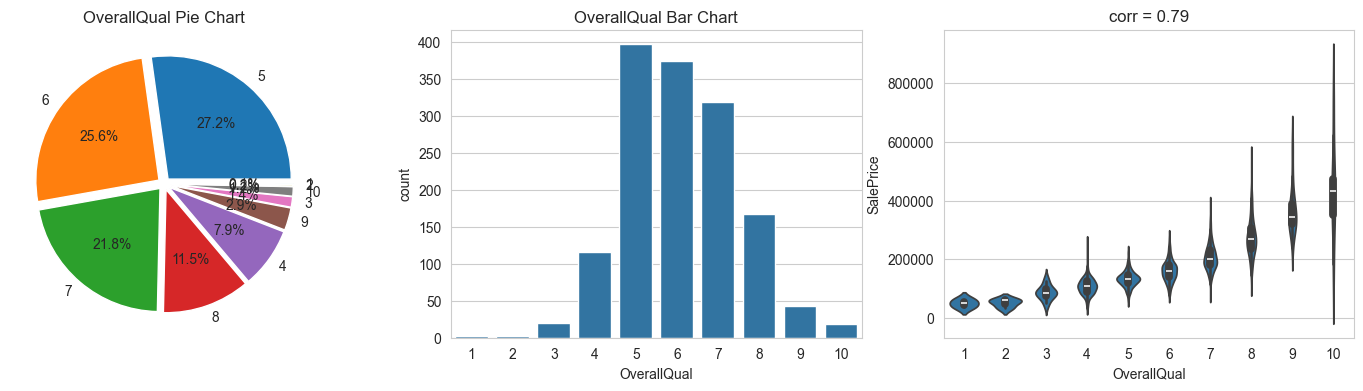

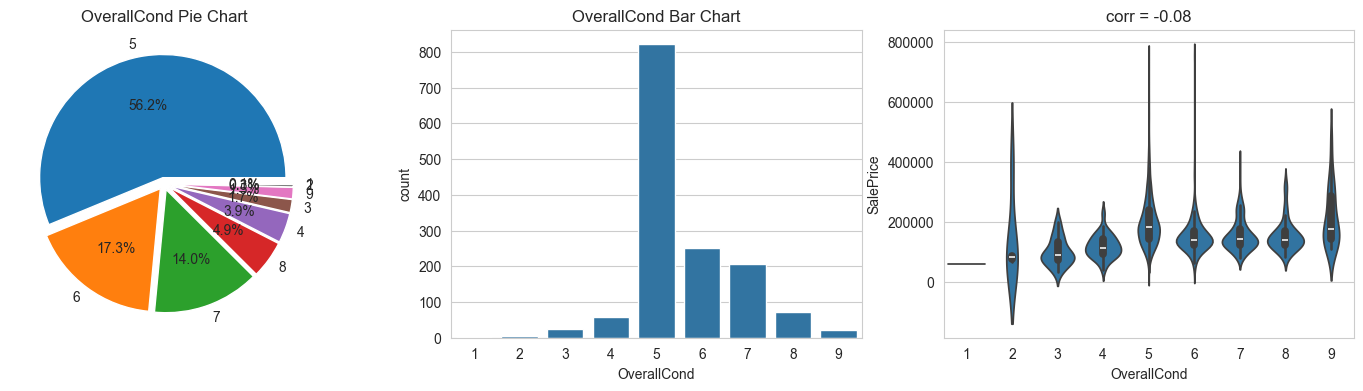

In [81]:
cat_var = ['OverallQual', 'OverallCond']
for var in cat_var:
    corr = corr_matrix.loc[var,target]
    cat_dist(df[var], df[target], var, corr=corr)

75% домов имеют оценку качества материала и отделки дома от 5 до 7. Наблюдается рост стоимости дома с ростом оценки качества (полиномиальный тренд). \
Половина проданных домов со средней оценкой общего состояния дома, не влияет на стоимость.

**Exterior1st** - наружное покрытие дома \
**Exterior2nd** - наружное покрытие дома (если используется более одного материала)

In [82]:
cat_var = ['Exterior1st', 'Exterior2nd']

In [83]:
for var in cat_var:
    target_coding(df, var, target)

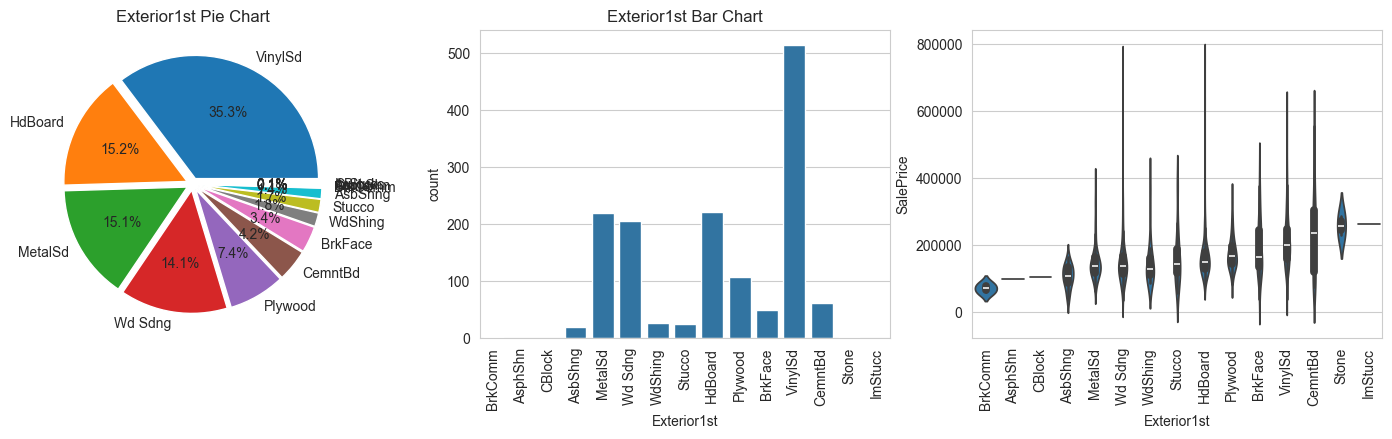

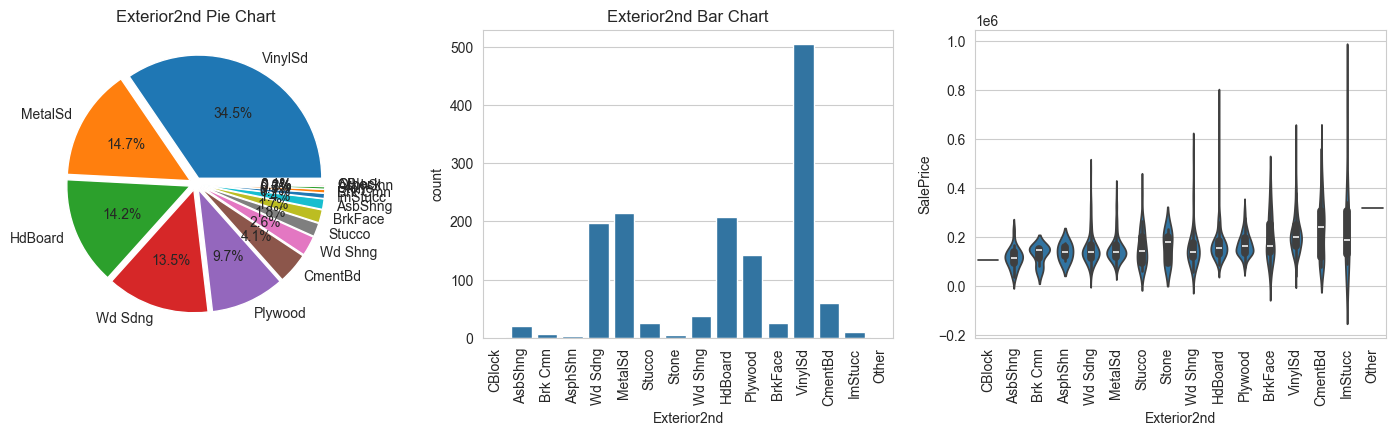

In [84]:
for var in cat_var:
    cat_dist_encoded(df, var, target, rotation=90)

Самое распространенное наружное покрытие дома - виниловый сайдинг. \
Наблюдается зависимость медианной цены от вида основного наружного покрытия.

**MasVnrType** - тип облицовки каменной кладки \
Большинство домов не имеют каменной облицовки. Дома с облицовкой натуральным камнем в среднем стоят дороже.

**MasVnrArea** - площадь облицовки каменной кладки в квадратных футах \
Слабая линейная зависимость между площадью облицовки каменной кладки и ценой.

**ExterQual** - оценка качества материала наружного покрытия \
**ExterCond** - оценка текущего состояния материала наружного покрытия

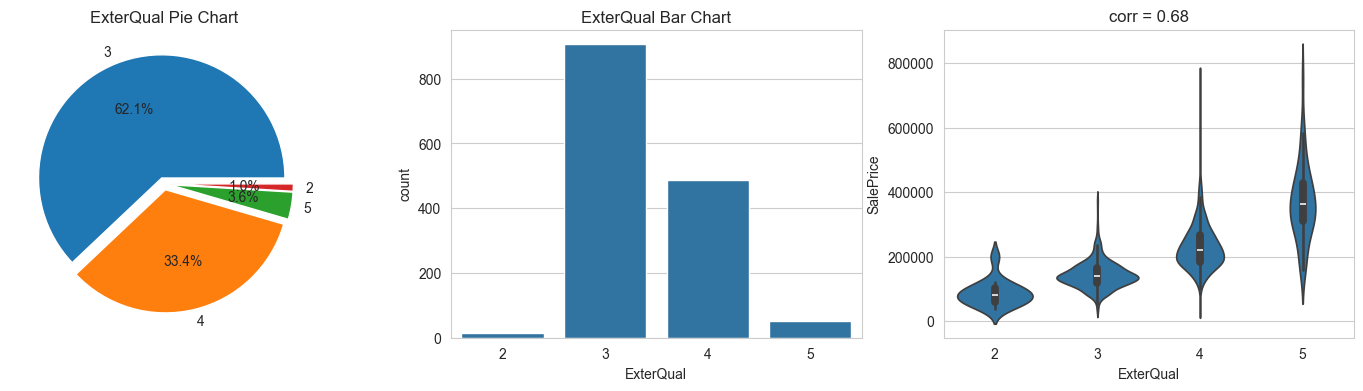

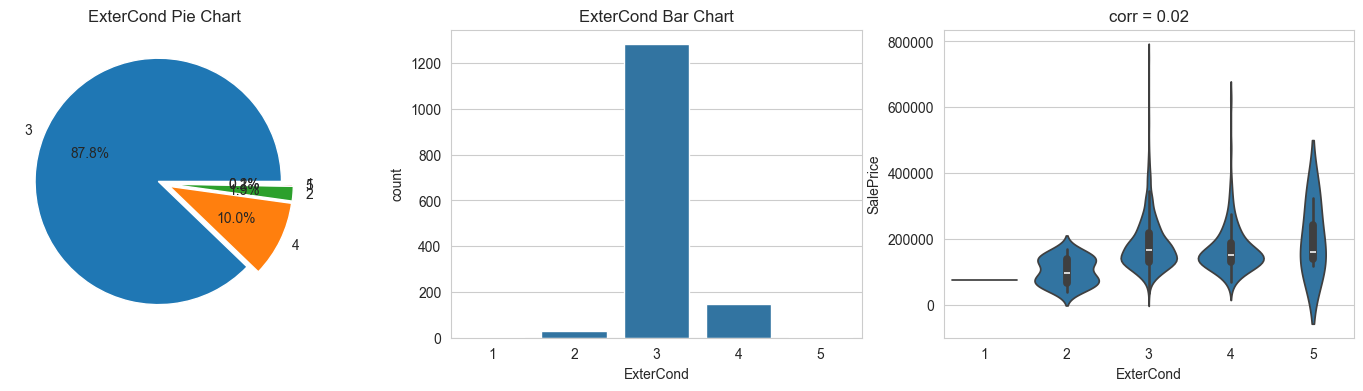

In [85]:
cat_var = ['ExterQual', 'ExterCond']
for var in cat_var:
    corr = corr_matrix.loc[var, target]
    cat_dist(df[var], df[target], var, corr)

Больше половины домов со средней оценкой качества материала наружного покрытия. \
Средняя линейная зависимость цены от качества материала наружного покрытия.

Преобладающее большинство домов на момент продажи имело среднее состояние материала наружного покрытия. \
Нет зависимости цены от состояния материала наружного покрытия.

**BsmtQual** - высота подвала \
**BsmtCond** - общее состояние подвала \
**BsmtExposure** - стены подвала на уровне сада или выходного этажа \
**BsmtFinType1** - качество готовой площади подвала \
**BsmtFinSF1** - тип 1 готовые квадратные футы \
**BsmtFinType2** - качество второй готовой площади (если имеется) \
**BsmtFinSF2** - тип 2 готовые квадратные футы \
**BsmtUnfSF** - незаконченные квадратные метры площади подвала

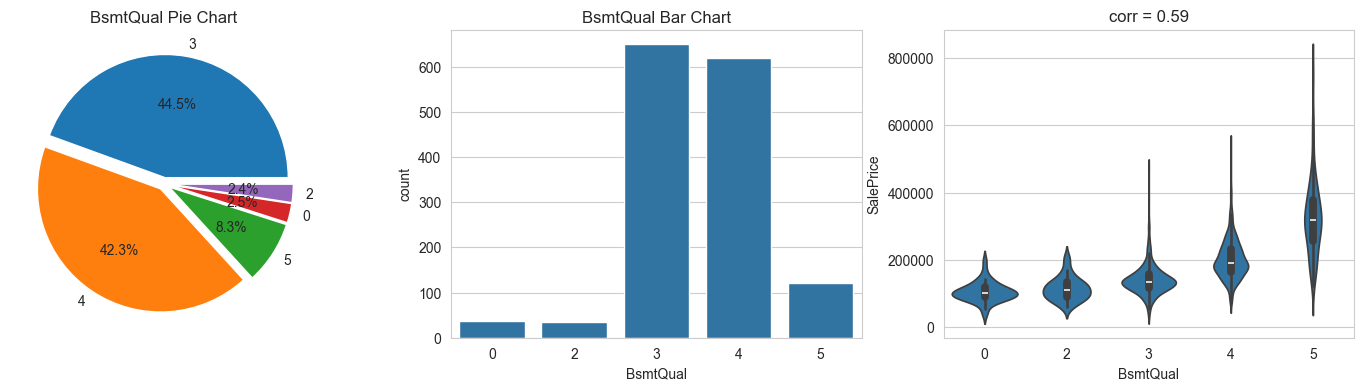

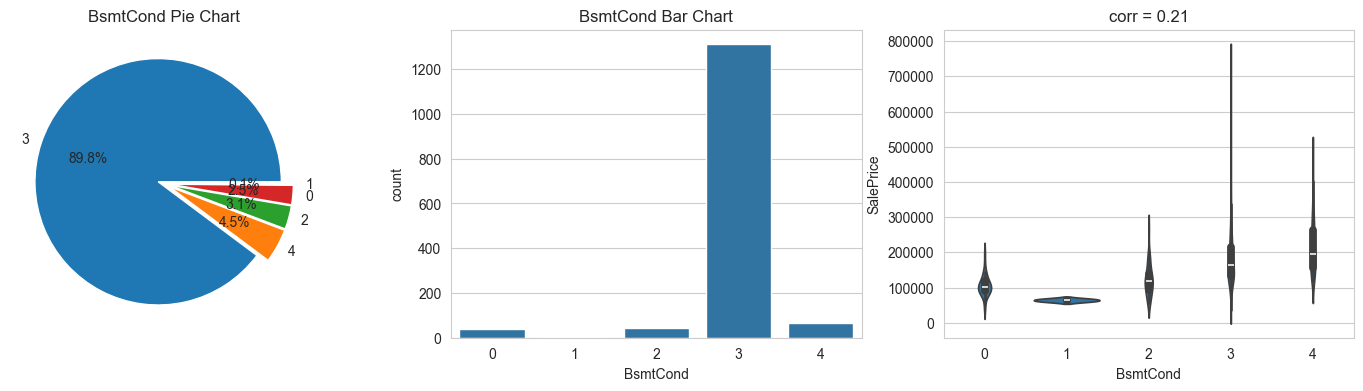

In [86]:
cat_var = ['BsmtQual', 'BsmtCond']
for var in cat_var:
    cat_dist(df[var], df[target], var, corr_matrix.loc[var,target])

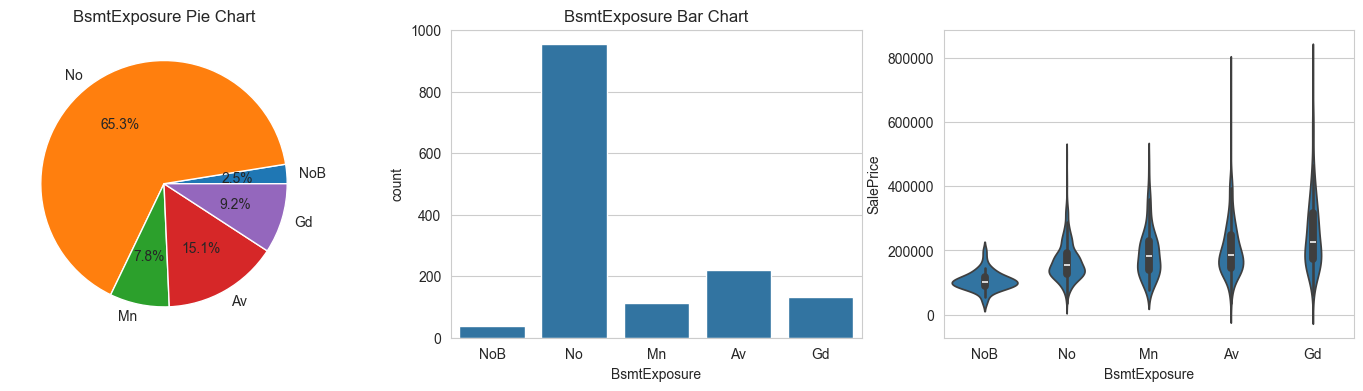

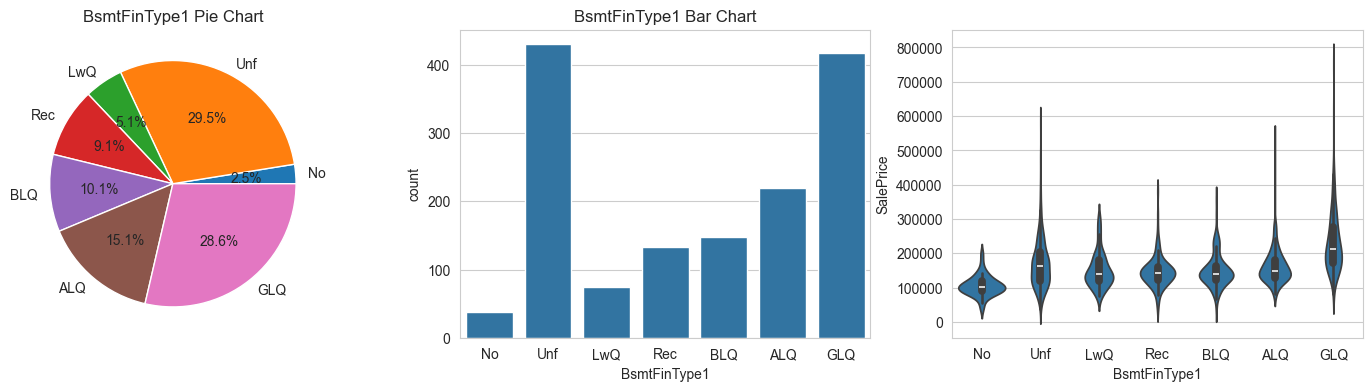

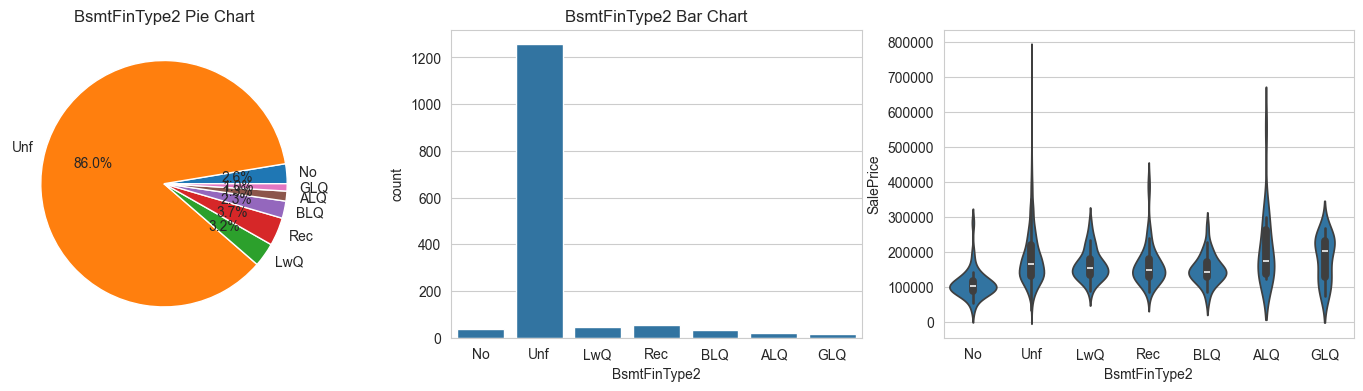

In [87]:
cat_var = ['BsmtExposure','BsmtFinType1','BsmtFinType2']
for var in cat_var:
    category_dist(df, var, target)

Большинство домов имеют подвал. \
Заметное влияние на цену имеет высота подвала (**BsmtQual**). \
Дома с хорошим общим состоянием подвала (**BsmtCond**) и высоким уровнем стен (**BsmtExposure**) в среднем продаются дороже. \
Качество первой (**BsmtFinType1**) и втрой (**BsmtFinType2**) готовой площади подвала не влияют на цену дома.

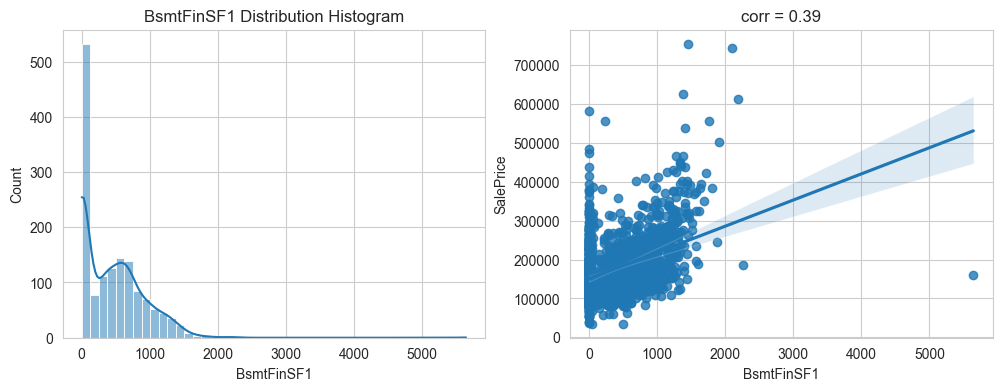

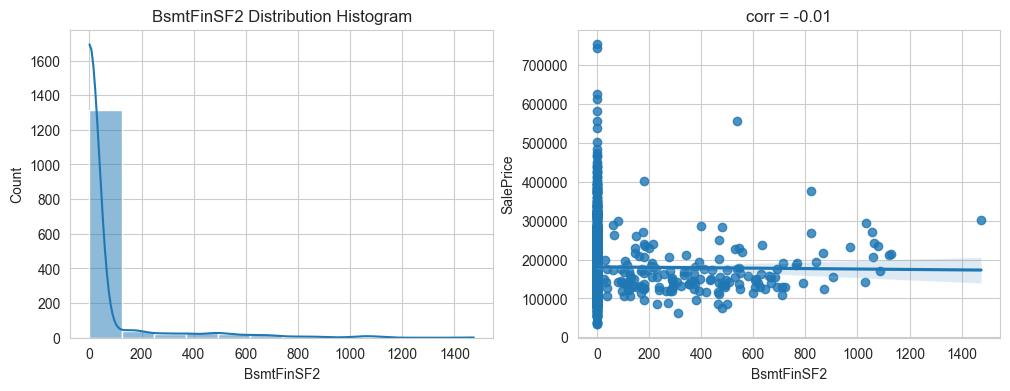

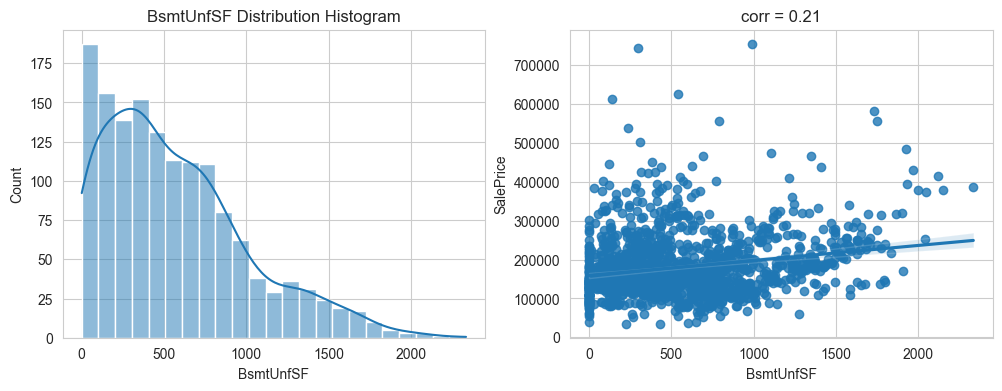

In [88]:
num_var = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']
for var in num_var:
    num_dist_corr(df, var, target, corr_matrix.loc[var,target])

Большинство подвалов без ремонта. \
Есть слабая линейная зависимость цены с готовыми квадратными футами первого типа.

**Heating** - тип отопления \
**HeatingQC** - качество и состояние отопления

In [89]:
cat_var = ['Heating', 'HeatingQC']
target_coding(df, 'Heating', target)

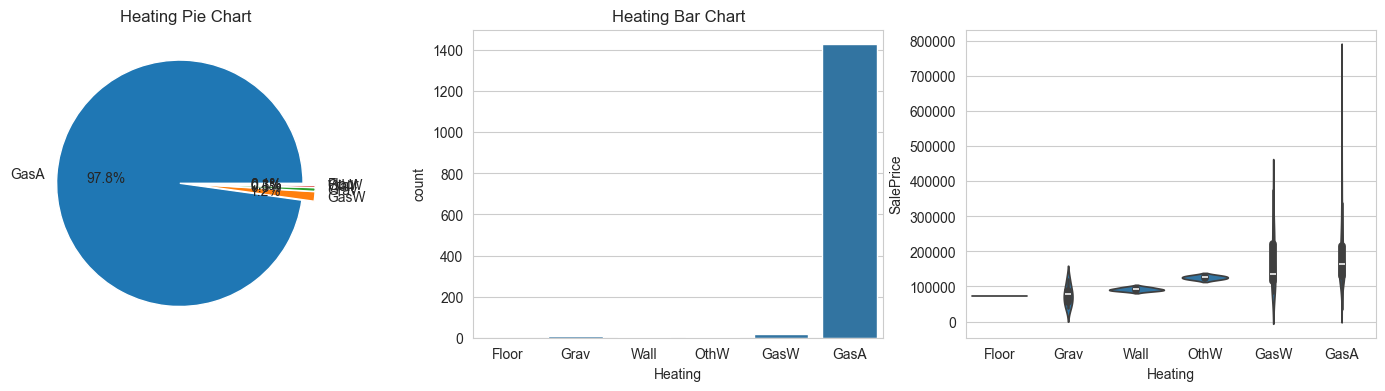

In [90]:
cat_dist_encoded(df, 'Heating', target, rotation=0)

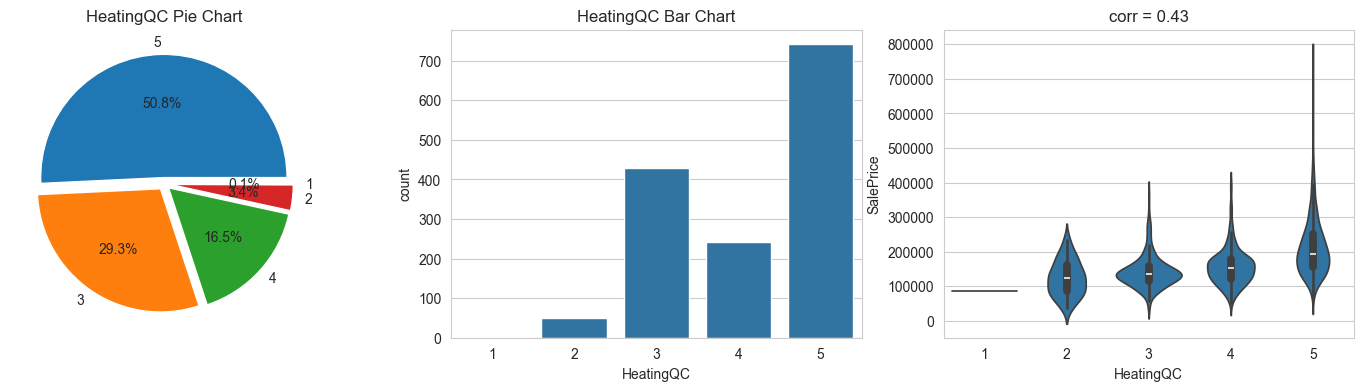

In [91]:
var = 'HeatingQC'
cat_dist(df[var], df[target], var, corr_matrix.loc[var, target])

Практически все дома имеют газовую печь с принудительным нагревом теплого воздуха. \
Есть слабая линейная связь цены с качеством и состоянием отопления.

**BsmtFullBath** - полностью оборудованные ванные комнаты в подвале \
**BsmtHalfBath** - туалет в подвале \
**FullBath** - полностью оборудованные ванные комнаты в жилой зоне \
**HalfBath** - туалет в жилой зоне \
**BedroomAbvGr** - спальни (не включая спальни в подвале) \
**KitchenAbvGr** - кухни \
**KitchenQual** - качество кухни \
**TotRmsAbvGrd** - общее количество комнат в жилой зоне (без учета ванных комнат)

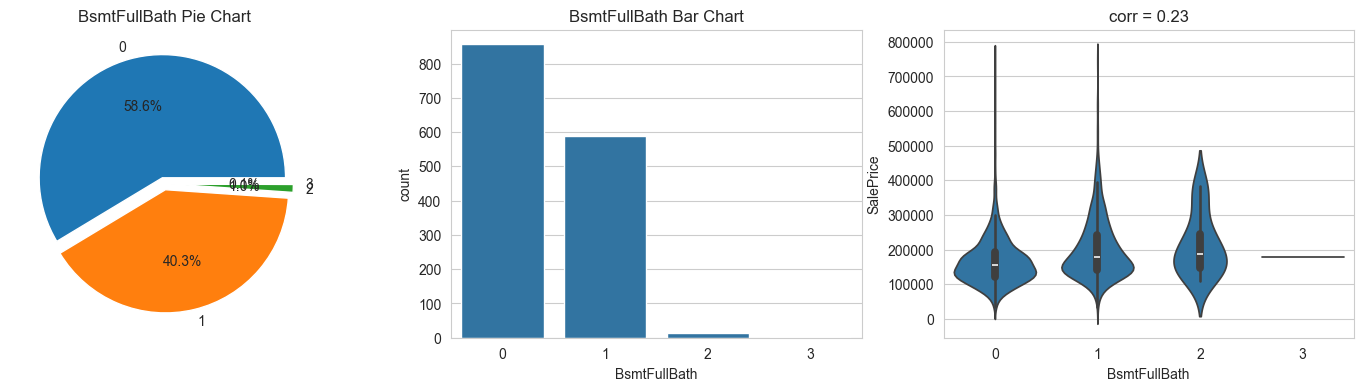

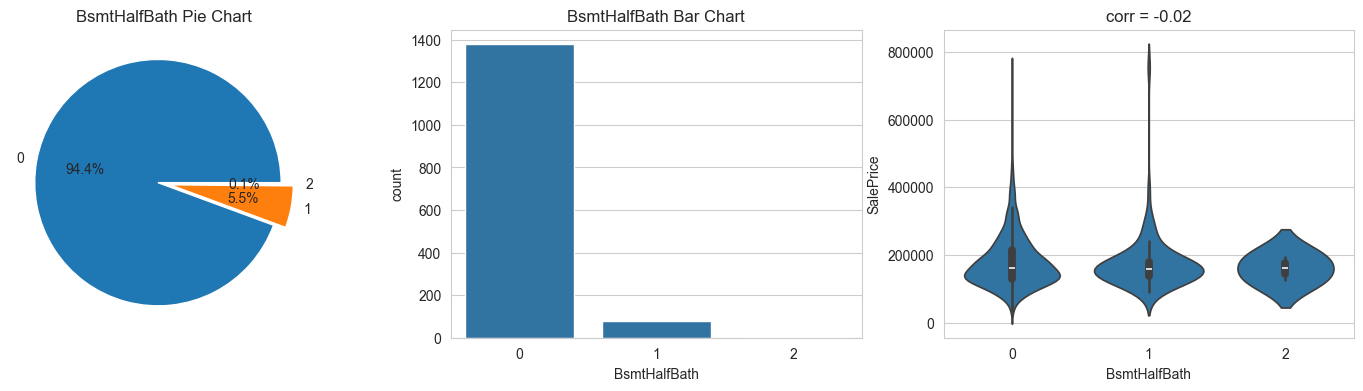

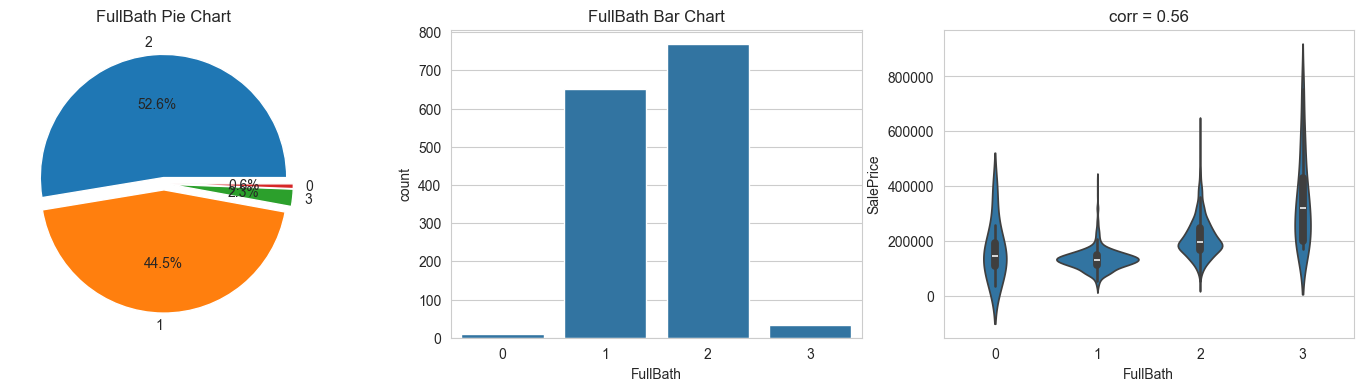

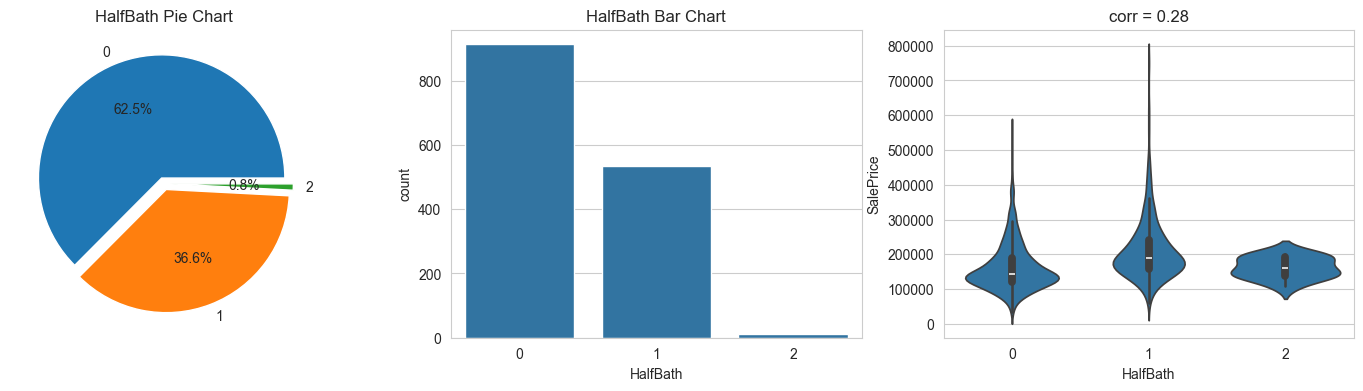

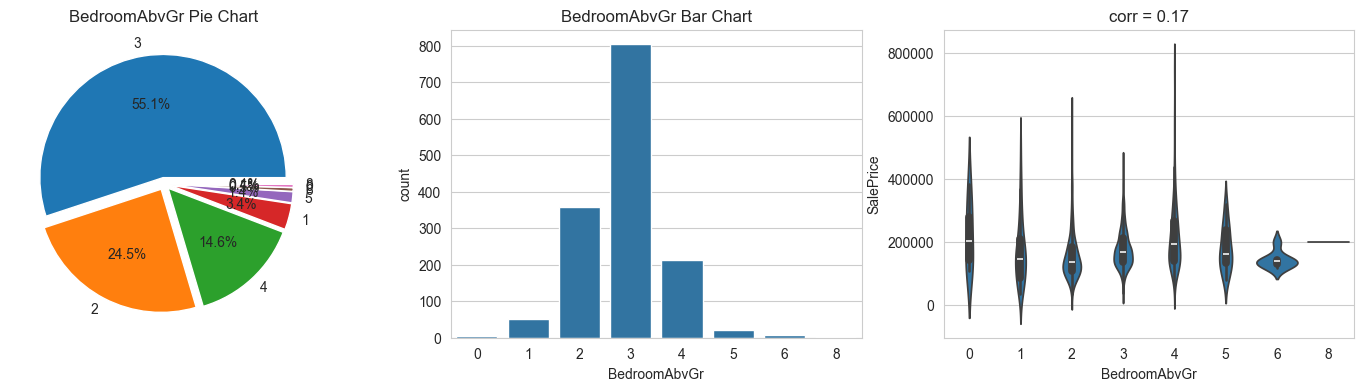

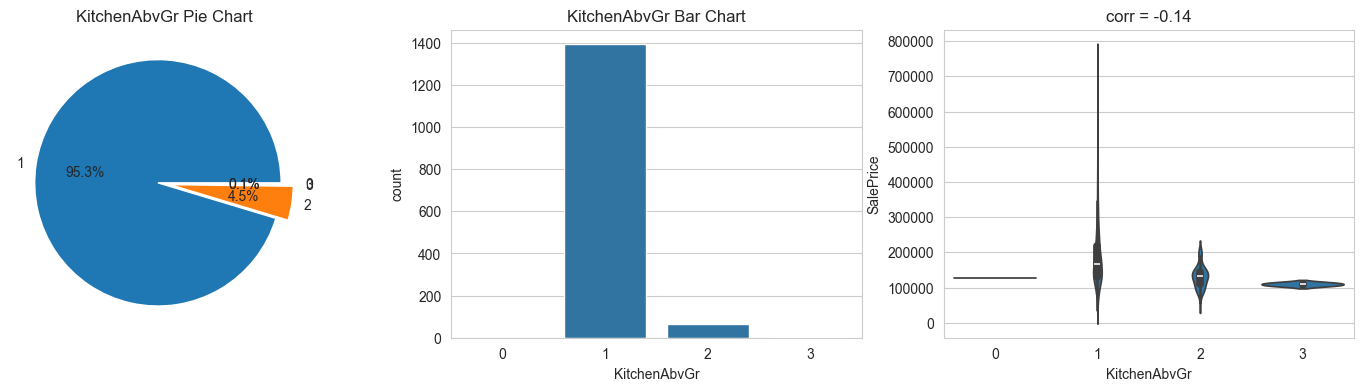

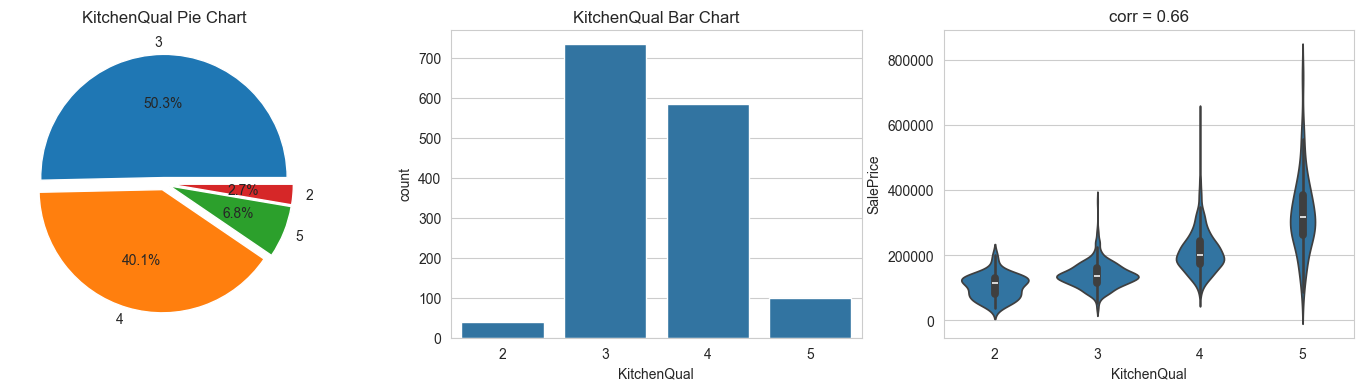

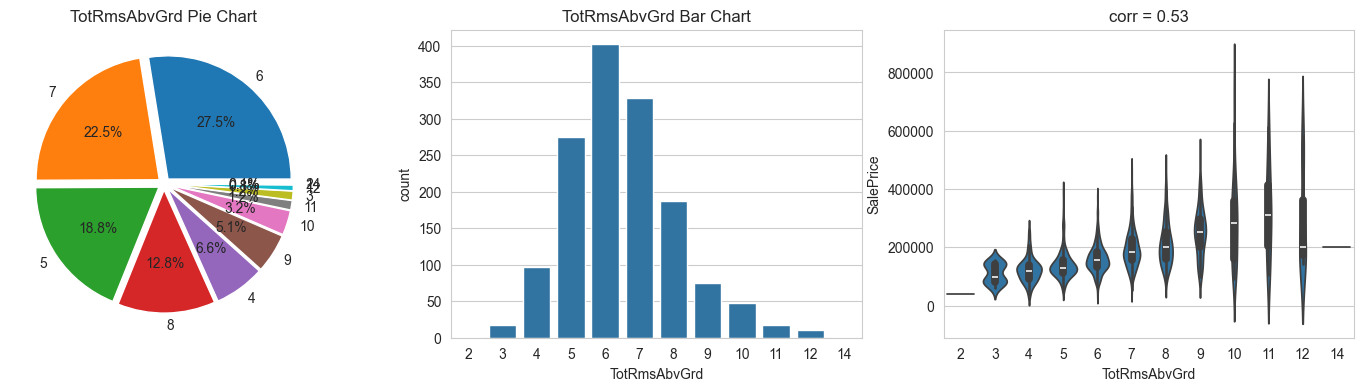

In [92]:
cat_var = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd']
for var in cat_var:
    cat_dist(df[var], df[target], var, corr_matrix.loc[var,target])

Практически все дома имеют 1-2 ванные комнаты. Количество ванных комнат (FullBath) влияет на цену дома. \
Так же среднюю линейную зависимость с ценой дома имеет общее количество комнат (TotRmsAbvGrd) и качество кухни (KitchenQual).

**Fireplaces** - количество каминов \
**FireplaceQu** - качество камина

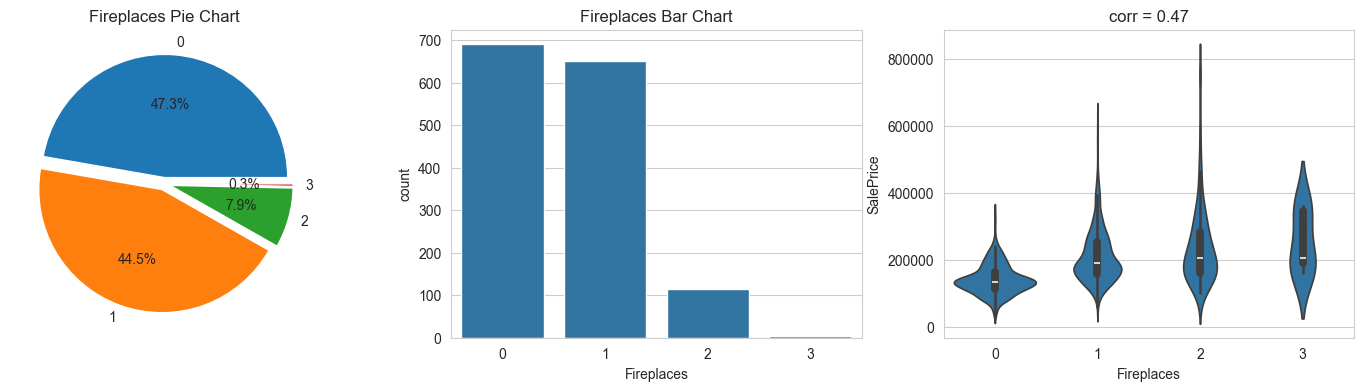

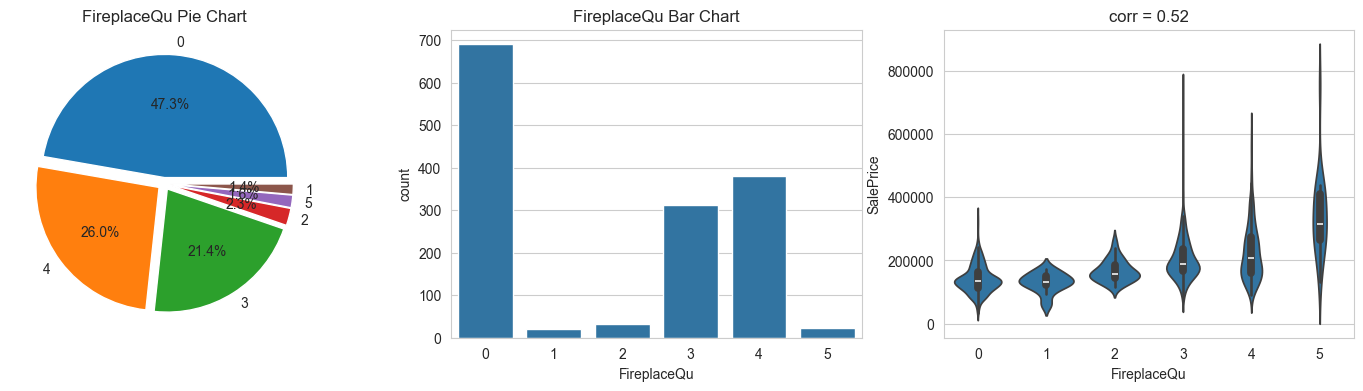

In [93]:
cat_var = ['Fireplaces', 'FireplaceQu']
for var in cat_var:
    cat_dist(df[var], df[target], var, corr_matrix.loc[var,target])

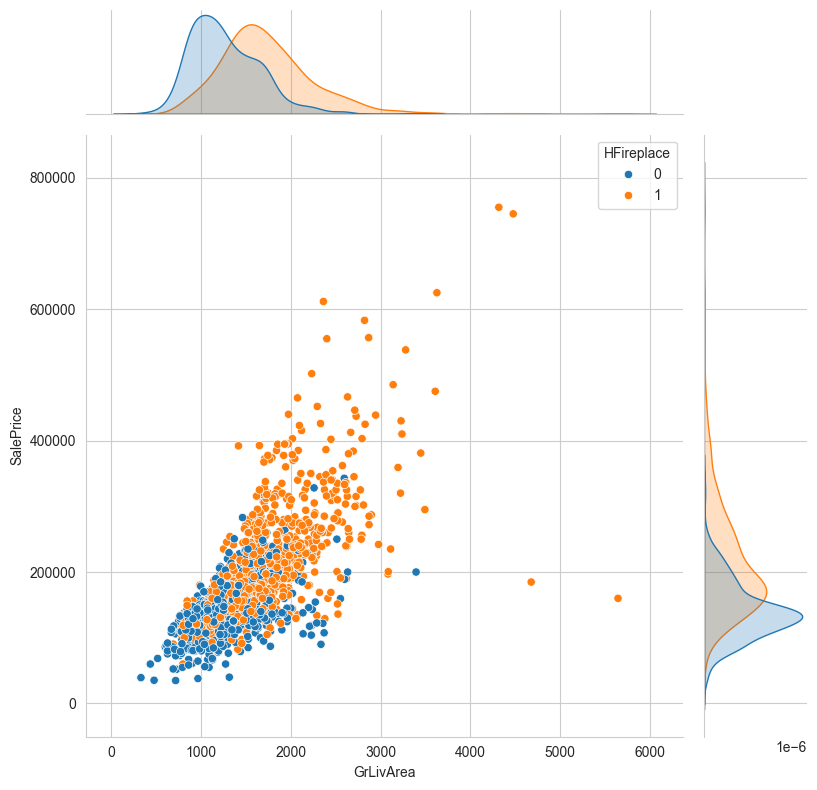

In [94]:
df['HFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x else 0)
sns.jointplot(data=df, x='GrLivArea', y=target, hue='HFireplace', height=8);

На цену влияет наличие камина(ов) (не количество) и их превосходное состояние. \
Так же есть средняя линейная зависимость между жилой площадью и количеством каминов.

**GarageType** - расположение гаража \
**GarageFinish** - внутренняя отделка гаража \
**GarageCars** - размер гаража в пересчете на вместимость автомобиля \
**GarageQual** - качество гаража \
**GarageCond** - состояние гаража

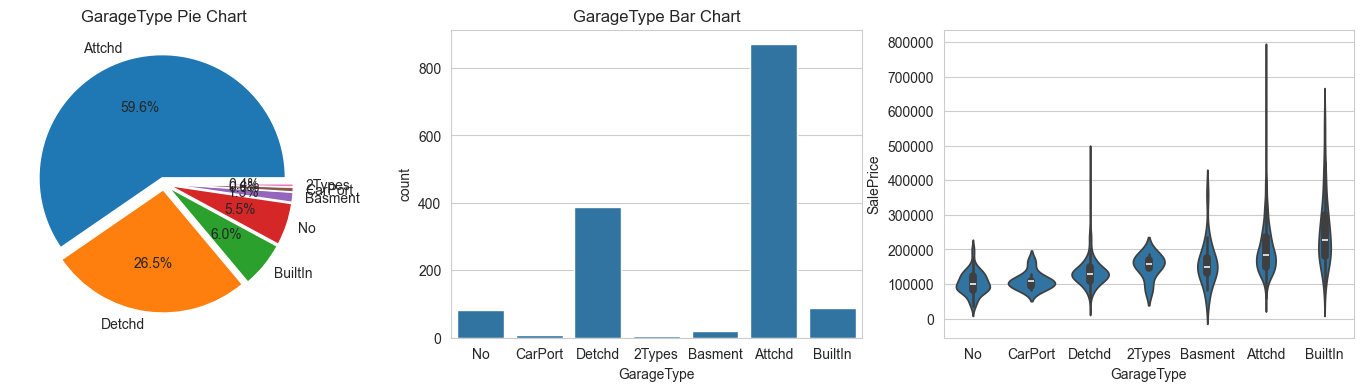

In [95]:
var = 'GarageType'
target_coding(df, var, target)
cat_dist_encoded(df, var, target, rotation=0)

Практически все дома имеют гараж. Больше половины гаражей пристроены к дому. Расположение гаража влияет на цену.

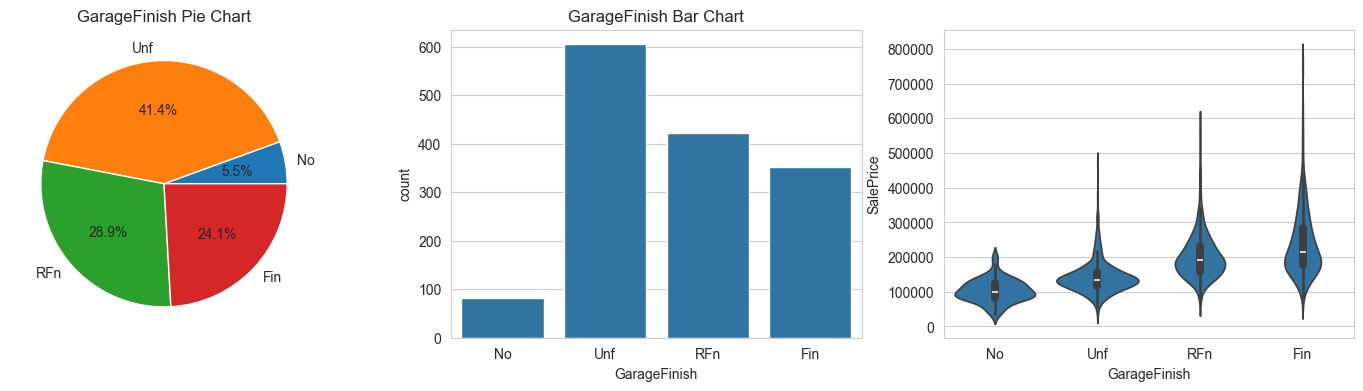

In [96]:
var = 'GarageFinish'
category_dist(df, var, target)

40% гаражей не имеют внутренней отделки, 30% - в черновой отделке и только 25% - с ремонтом. \
Внутренняя отделка гаража влияет на цену дома.

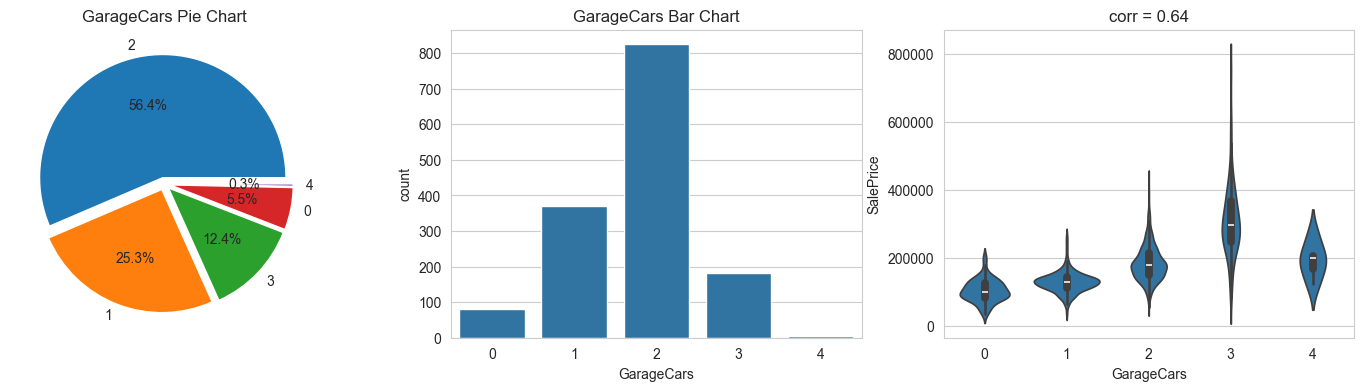

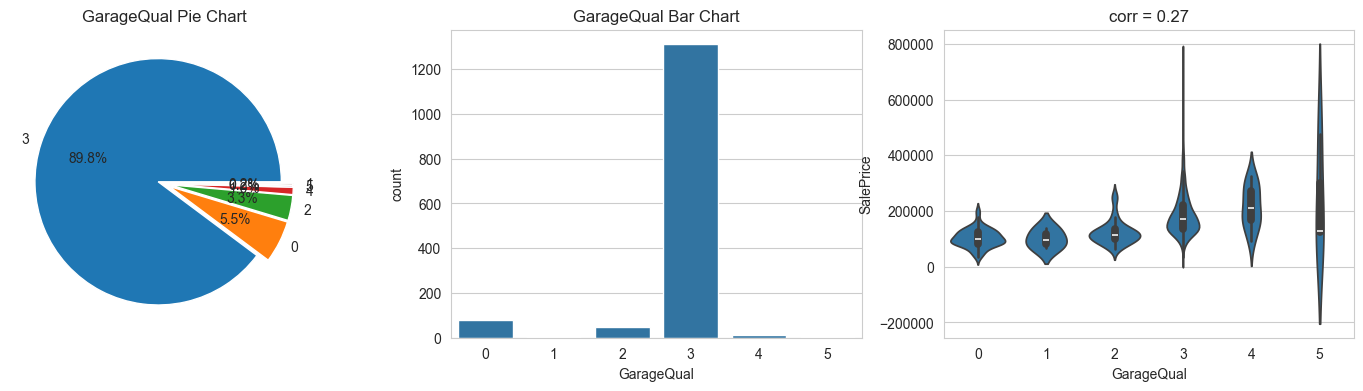

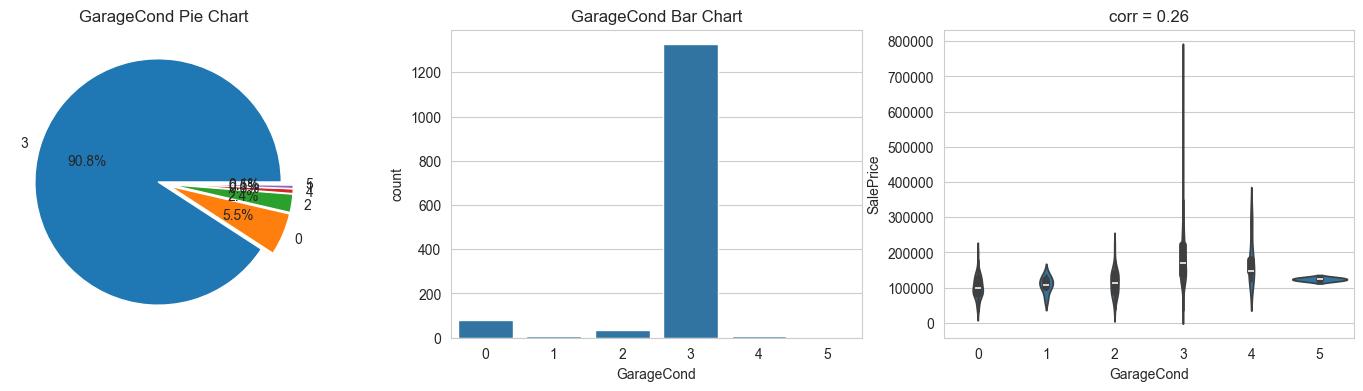

In [97]:
cat_var = ['GarageCars', 'GarageQual', 'GarageCond']
for var in cat_var:
    cat_dist(df[var], df[target], var, corr_matrix.loc[var, target])

Большинство домов имеют гараж на 1-2 машины. Есть средняя линейная зависимость цены от количества мест в гараже. \
Практически все гаражи имеют среднее качество и состояние.

**Neighborhood** - район города

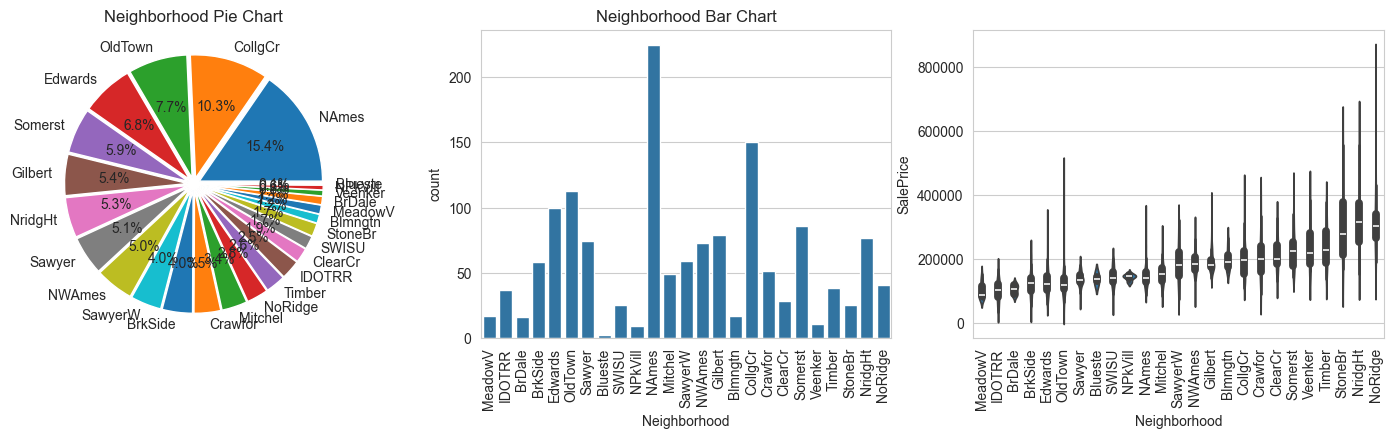

In [98]:
var = 'Neighborhood'
target_coding(df, var, target)
cat_dist_encoded(df, var, target)

Местонахождение дома (район города) значительно влияет на стоимость дома.

5. **Выполните проектирование признаков путем реализации следующих преобразований:** \
   **a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной.** \
   **b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.**

Выберем признаки, оказывающие наибольшее влияние на зависимую переменную.

In [99]:
data = df[['Neighborhood', 'OverallQual', 'AgeBuildind', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', 'CentralAir', 'GrLivArea', 'TotalArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'FireplaceQu', 'GarageType', 'GarageCars']]

Конвертируем категориальную переменную **GarageType** в фиктивные с помощью one-hot encoding.

In [100]:
data = pd.get_dummies(data, columns=['GarageType'], dtype=int)

У категориальной переменной **Neighborhood** преобразуем буквеные обозначения в цифровые с помощью label encoding.

In [101]:
var = 'Neighborhood'
le = LabelEncoder()
data[var] = le.fit_transform(data[var].astype(str))

6. **Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.**

In [103]:
data

Neighborhood  OverallQual  AgeBuildind  ExterQual  BsmtQual  \
Id                                                                  
1                5            7            5          4         4   
2               24            6           31          3         4   
3                5            7            7          4         4   
4                6            7           91          3         3   
5               15            8            8          4         4   
...            ...          ...          ...        ...       ...   
1456             8            6            8          3         4   
1457            14            6           32          3         4   
1458             6            7           69          5         3   
1459            12            5           60          3         3   
1460             7            5           43          4         3   

      TotalBsmtSF  CentralAir  GrLivArea  TotalArea  FullBath  ...  \
Id                                                             ...   
1             856           1       1710       2566         2  ...   
2            1262           1       1262       2524         2  ...   
3             920           1       1786       2706         2  ...   
4             756           1       1717       2473         1  ...   
5            1145           1       2198       3343         2  ...   
...           ...         ...        ...        ...       ...  ...   
1456          953           1       1647       2600         2  ...   
1457         1542           1       2073       3615         2  ...   
1458         1152           1       2340       3492         2  ...   
1459         1078           1       1078       2156         1  ...   
1460         1256           1       1256       2512         1  ...   

      TotRmsAbvGrd  FireplaceQu  GarageCars  GarageType_2Types  \
Id                                                               
1                8            0           2                  0   
2                6            3           2                  0   
3                6            3           2                  0   
4                7            4           3                  0   
5                9            3           3                  0   
...            ...          ...         ...                ...   
1456             7            3           2                  0   
1457             7            3           2                  0   
1458             9            4           1                  0   
1459             5            0           1                  0   
1460             6            0           1                  0   

      GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
Id                                                                
1                     1                   0                   0   
2                     1                   0                   0   
3                     1                   0                   0   
4                     0                   0                   0   
5                     1                   0                   0   
...                 ...                 ...                 ...   
1456                  1                   0                   0   
1457                  1                   0                   0   
1458                  1                   0                   0   
1459                  1                   0                   0   
1460                  1                   0                   0   

      GarageType_CarPort  GarageType_Detchd  GarageType_No  
Id                                                          
1                      0                  0              0  
2                      0                  0              0  
3                      0                  0              0  
4                      0                  1              0  
5                      0                  0              0  
...                  ...               

In [102]:
data.to_csv('cleaned_house_prices.csv', index=False)